# Lectura de archivos CSV desde Google DRIVE solo haciendo referencia al link de export... deben dar permisos al archivo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import isnan

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Lectura de archivos CSV desde Google DRIVE solo haciendo referencia al link de export... deben dar permisos al archivo

In [ ]:
%cd '/content/gdrive/MyDrive/dataScience/datasets'
!ls

/content/gdrive/MyDrive/dataScience/datasets
 1SegundaEntrega+AcevedoCarbajal.ipynb
 2SegundaEntrega+AcevedoCarbajal.ipynb
 3SegundaEntrega+AcevedoCarbajal.ipynb
'API_19_DS2_en_csv_v2_4357095 (1).gsheet'
'API_19_DS2_en_csv_v2_4357095 (2).gsheet'
'API_19_DS2_en_csv_v2_4357095 (3).gsheet'
 API_19_DS2_en_csv_v2_4357095.csv
 API_19_DS2_en_csv_v2_4357095.gsheet
'API_AG.LND.AGRI (1).K2_DS2_en_csv_v2_4356623.gsheet'
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_4356623.csv
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_4356623.gsheet
'API_AG.LND.FRST (1).K2_DS2_en_csv_v2_4368587.gsheet'
 API_AG.LND.FRST.K2_DS2_en_csv_v2_4368587.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_4368587.gsheet
'API_EG.USE.ELEC.KH (1).PC_DS2_en_csv_v2_4356516.gsheet'
'API_EG.USE.ELEC.KH (2).PC_DS2_en_csv_v2_4356516.gsheet'
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4356516.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4356516.gsheet
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4354173.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4354173.gsheet
 API_SP.POP.TOTL_DS2_en_csv_v2_43

In [ ]:
!head 'Final.csv'

Country Name;Indicator Name;Indicator Code;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019
Aruba;Access to electricity (% of population);EG.ELC.ACCS.ZS;100;99,15365601;99,1971283;99,23991394;100;100;100;100;100;100;91,66040039;100;100;100;100;100;100;100;100;100;93,35629272;100;100;100;100;100;100;100;100;100
Africa Eastern and Southern;Access to electricity (% of population);EG.ELC.ACCS.ZS;;;;;;;;;;;19,81128305;19,90056899;21,52581195;22,47430904;23,78191837;23,48741496;24,76353792;26,76651776;25,93417948;26,1815568;27,55713714;29,08982683;31,8443844;31,79415999;32,00102678;33,87191046;38,88017322;40,2613576;43,06187695;44,27086048
Afghanistan;Access to electricity (% of population);EG.ELC.ACCS.ZS;;;;;;;;;;;1,613590956;4,074573994;9,409157753;14,73850632;20,06496811;25,39089394;30,71869087;36,05101013;42,40000153;46,74005127;42,70000076;43,2220192;69,09999847;68,29064941;89,5;71,5;97,

In [ ]:
dg= pd.read_csv('https://docs.google.com/spreadsheets/d/1aS88gun7H9-4Oi8NcbVK9pIdCb-xlZmwarqxFBhPugE/export?format=csv&gid=11624476',sep=',')
de=dg[['Area','Months','Element','Y1990','Y1991','Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999','Y2000','Y2001','Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010','Y2011','Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']]
de

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,Jun–Jul–Aug,Standard Deviation,0.247,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,Sep–Oct–Nov,Temperature change,0.209,0.043,-0.385,-0.388,0.623,0.285,-0.202,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,OECD,Sep–Oct–Nov,Standard Deviation,0.378,0.378,0.378,0.378,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,OECD,Meteorological year,Temperature change,0.509,0.486,0.257,0.229,0.487,0.690,0.110,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [ ]:
import pandas as pd

# PROYECTO DE CALENTAMIENTO GLOBAL - Nahuel Acevedo y María Carbajal





In [ ]:
My = de['Months'] == "Meteorological year"
My

0       False
1       False
2       False
3       False
4       False
        ...  
9651    False
9652    False
9653    False
9654     True
9655     True
Name: Months, Length: 9656, dtype: bool

In [ ]:
de1= de[My]
de1

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.320,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
33,Afghanistan,Meteorological year,Standard Deviation,0.548,0.548,0.548,0.548,0.548,0.548,0.548,...,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548
66,Albania,Meteorological year,Temperature change,0.846,-0.238,0.122,0.137,1.399,-0.099,0.046,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
67,Albania,Meteorological year,Standard Deviation,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,Annex I countries,Meteorological year,Standard Deviation,0.306,0.306,0.306,0.306,0.306,0.306,0.306,...,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306
9620,Non-Annex I countries,Meteorological year,Temperature change,0.507,0.387,0.096,0.308,0.502,0.568,0.402,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361
9621,Non-Annex I countries,Meteorological year,Standard Deviation,0.202,0.202,0.202,0.202,0.202,0.202,0.202,...,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202
9654,OECD,Meteorological year,Temperature change,0.509,0.486,0.257,0.229,0.487,0.690,0.110,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [ ]:
 My2= de1['Element']=="Temperature change"
 My2.head()

32      True
33     False
66      True
67     False
100     True
Name: Element, dtype: bool

In [ ]:
de2=de1[My2]
de2

,Area,Months,Element,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.320,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,Meteorological year,Temperature change,0.846,-0.238,0.122,0.137,1.399,-0.099,0.046,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
134,American Samoa,Meteorological year,Temperature change,0.520,0.848,0.941,NaN,NaN,0.871,0.834,...,1.271,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,0.541,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.394,0.382,0.055,0.317,0.322,0.465,0.465,...,1.345,0.872,0.618,0.875,0.820,1.061,1.292,1.276,1.094,1.244
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,0.473,...,1.350,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412
9586,Annex I countries,Meteorological year,Temperature change,0.813,0.555,0.305,0.400,0.497,1.206,0.281,...,1.209,1.090,1.512,1.109,1.119,1.616,2.098,1.607,1.397,1.627
9620,Non-Annex I countries,Meteorological year,Temperature change,0.507,0.387,0.096,0.308,0.502,0.568,0.402,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361


In [ ]:
de2 = de2.rename(columns=lambda x: x.replace('Y', ''))
de2

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.320,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,Meteorological year,Temperature change,0.846,-0.238,0.122,0.137,1.399,-0.099,0.046,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
134,American Samoa,Meteorological year,Temperature change,0.520,0.848,0.941,NaN,NaN,0.871,0.834,...,1.271,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,0.541,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.394,0.382,0.055,0.317,0.322,0.465,0.465,...,1.345,0.872,0.618,0.875,0.820,1.061,1.292,1.276,1.094,1.244
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,0.473,...,1.350,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412
9586,Annex I countries,Meteorological year,Temperature change,0.813,0.555,0.305,0.400,0.497,1.206,0.281,...,1.209,1.090,1.512,1.109,1.119,1.616,2.098,1.607,1.397,1.627
9620,Non-Annex I countries,Meteorological year,Temperature change,0.507,0.387,0.096,0.308,0.502,0.568,0.402,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361


In [ ]:
dgg=de2[My]
dgg

<ipython-input-15-3c22ba280913>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dgg=de2[My]


,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.320,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,Meteorological year,Temperature change,0.846,-0.238,0.122,0.137,1.399,-0.099,0.046,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
134,American Samoa,Meteorological year,Temperature change,0.520,0.848,0.941,NaN,NaN,0.871,0.834,...,1.271,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,0.541,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.394,0.382,0.055,0.317,0.322,0.465,0.465,...,1.345,0.872,0.618,0.875,0.820,1.061,1.292,1.276,1.094,1.244
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,0.473,...,1.350,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412
9586,Annex I countries,Meteorological year,Temperature change,0.813,0.555,0.305,0.400,0.497,1.206,0.281,...,1.209,1.090,1.512,1.109,1.119,1.616,2.098,1.607,1.397,1.627
9620,Non-Annex I countries,Meteorological year,Temperature change,0.507,0.387,0.096,0.308,0.502,0.568,0.402,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361


In [ ]:
range(1990, 2020)
map(str, range(1990, 2020))
cols = ['Months', 'Area'] + list(map(str, range(1990, 2020)))
cols[:5]

['Months', 'Area', '1990', '1991', '1992']

In [ ]:
dgg = dgg.transpose()
dgg

,32,66,100,134,168,202,236,270,304,338,...,9348,9382,9416,9450,9484,9518,9552,9586,9620,9654
Area,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,Polynesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,Annex I countries,Non-Annex I countries,OECD
Months,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,...,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year,Meteorological year
Element,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,...,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change,Temperature change
1990,0.766,0.846,1.314,0.52,1.734,0.737,0.244,0.289,0.219,0.42,...,0.437,1.36,0.494,0.681,0.461,0.394,0.526,0.813,0.507,0.509
1991,-0.178,-0.238,0.078,0.848,0.219,0.325,0.28,0.678,0.294,0.233,...,0.503,0.36,0.433,0.567,0.34,0.382,0.421,0.555,0.387,0.486
1992,-0.32,0.122,-0.253,0.941,0.343,0.435,0.011,0.334,NaN,-0.3,...,0.467,0.79,0.114,0.178,0.437,0.055,0.194,0.305,0.096,0.257
1993,0.172,0.137,0.618,NaN,0.185,0.261,0.294,-0.734,0.314,0.049,...,0.185,0.254,0.336,0.217,0.342,0.317,0.361,0.4,0.308,0.229
1994,0.423,1.399,0.796,NaN,1.518,0.271,0.352,-0.234,0.308,0.451,...,0.369,1.104,0.362,0.406,0.467,0.322,0.433,0.497,0.502,0.487
1995,0.363,-0.099,0.649,0.871,1.252,0.807,0.484,-0.285,0.538,0.225,...,0.663,1.116,0.542,0.94,0.853,0.465,0.604,1.206,0.568,0.69
1996,-0.106,0.046,0.906,0.834,0.541,0.436,0.233,0.778,0.281,0.462,...,0.459,-0.092,0.553,0.317,0.57,0.465,0.473,0.281,0.402,0.11


In [ ]:
datafinal=pd.read_csv('Final.csv',sep=';', encoding='cp1252', decimal=',')
datafinal["Indicator Name"].unique()
group= datafinal.groupby(['Country Name', 'Indicator Name'])
group.first()

Indicator Code  \
Country Name Indicator Name                                                          
Afghanistan  Access to electricity (% of population)                EG.ELC.ACCS.ZS   
             Agricultural irrigated land (% of total agricul...  AG.LND.IRIG.AG.ZS   
             Agricultural land (% of land area)                     AG.LND.AGRI.ZS   
             Agricultural land (sq. km)                             AG.LND.AGRI.K2   
             Agriculture, forestry, and fishing, value added...     NV.AGR.TOTL.ZS   
...                                                                            ...   
Zimbabwe     Urban land area where elevation is below 5 mete...  AG.LND.EL5M.UR.K2   
             Urban population                                          SP.URB.TOTL   
             Urban population (% of total population)            SP.URB.TOTL.IN.ZS   
             Urban population growth (annual %)                        SP.URB.GROW   
             Urban population living in areas where elevatio...  EN.POP.EL5M.UR.ZS   

                                                                         1990  \
Country Name Indicator Name                                                     
Afghanistan  Access to electricity (% of population)                      NaN   
             Agricultural irrigated land (% of total agricul...           NaN   
             Agricultural land (% of land area)                  5.826670e+01   
             Agricultural land (sq. km)                          3.804000e+05   
             Agriculture, forestry, and fishing, value added...           NaN   
...                                                                       ...   
Zimbabwe     Urban land area where elevation is below 5 mete...           NaN   
             Urban population                                    3.024147e+06   
             Urban population (% of total population)            2.898800e+01   
             Urban population growth (annual %)                  5.285272e+00   
             Urban population living in areas where elevatio...           NaN   

                                                                         1991  \
Country Name Indicator Name                                                     
Afghanistan  Access to electricity (% of population)                      NaN   
             Agricultural irrigated land (% of total agricul...           NaN   
             Agricultural land (% of land area)                  5.825139e+01   
             Agricultural land (sq. km)                          3.803000e+05   
             Agriculture, forestry, and fishing, value added...           NaN   
...                                                                       ...   
Zimbabwe     Urban land area where elevation is below 5 mete...           NaN   
             Urban population                                    3.176318e+06   
             Urban population (% of total population)            2.973800e+01   
             Urban population growth (annual %)                  4.909360e+00   
             Urban population living in areas where elevatio...           NaN   

                                                                         1992  \
Country Name Indicator Name                                                     
Afghanistan  Access to electricity (% of population)                      NaN   
             Agricultural irrigated land (% of total agricul...           NaN   
             Agricultural land (% of land area)                  5.825139e+01   
             Agricultural land (sq. km)                          3.803000e+05   
             Agriculture, forestry, and fishing, value added...           NaN   
...                                                                       ...   
Zimbabwe     Urban land area where elevation is below 5 mete...           NaN   
             Urban population                                    3.324547e+06   
             Urban population (

In [ ]:
datafinal

,Country Name,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,...,93.356293,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.557137,29.089827,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860
2,Afghanistan,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.700001,43.222019,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997
3,Africa Western and Central,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,31.693097,32.714738,33.703684,32.748158,...,41.799858,45.911474,44.167973,47.048316,47.599323,46.766294,50.953487,48.861191,51.259712,51.290193
4,Angola,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.895638,34.599998,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,Kosovo,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20395,"Yemen, Rep.",Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,0.793343,NaN,NaN,NaN,NaN,NaN,NaN,...,0.852560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20396,South Africa,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,0.106375,NaN,NaN,NaN,NaN,NaN,NaN,...,0.109254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20397,Zambia,Urban population living in areas where elevati...,EN.POP.EL5M.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Abstracto

El presente estudio trata de responder a los siguientes interrogantes: ¿Estamos ante una crisis climática, esto es, el aumento sostenido de la variación de la temperatura? ¿Es una tendencia que se mantendrá a lo largo de los próximos años? ¿Como será su evolución en Argentina y en la región en los próximos años? La principal hipótesis que tratamos de comprobar es que, actualmente, estamos viviendo una crisis climática tal como sugieren distintos estudios científicos realizados por la ONU. Para responder este interrogante se llevó a cabo el análisis estadístico de los datos proporcionados por GISTEMP y NASA-GISS. A partir de este, obtuvimos un gráfico de serie de tiempo que nos permite observar el patrón alcista de la temperatura acumulada en el rango 1961-2019. Además, en el grafico [1], [2] y [3] se pueden observar su evolución en algunos países latinoamericanos y la variación de temperatura entre el primer año que se analizó y el ultimo en [4] y [8]

Finalmente, si observamos los gráficos [5] y [6] podemos resaltar que la temperatura acumulada correspondiente al periodo son muchos mas elevadas que durante el año.

Objetivo

Motivados por las recientes temperaturas que se están presentando en el mundo que son sin precedentes queremos ofrecer un estudio que ayude a empresas e instituciones gubernamentales a prepararse para afrontar esta situación. Nuestro objetivo es por medio de regresión estimar futuras temperaturas de modo tal que sea predecible y poder actuar en modo proactivo.

Prevención de problemas a nivel urbano:

https://www.bloomberg.com/news/articles/2022-07-19/british-rails-buckle-under-record-heat-in-europe-s-summer-of-woe

A nivel gubernamental: https://www.boe.es/buscar/doc.php?id=BOE-A-2021-8447

Contexto comercial

En la sección anterior se puede apreciar como este cambio en la temperatura ha forzado a instituciones y gobiernos a implementar medidas de forma repentina por lo que además de conocer un valor futuro para la temperatura es muy util conocer la correlación que pueden tener con otros fenómenos como:

Deforestación Emisiones de C02 Desertificación Energía usada Problema comercial

Se buscaría prever los cambios o impactos de estas temperaturas en caso salgan de lo normal. Ejemplo, actualmente en Inglaterra donde no se tienen jamás 40 grados han tenido que envolver puentes y pintar vías de tren en blanco para evitar la dilatación de los materiales. En Europa en general a estas temperaturas se refuerza la atención a a adultos mayores que sufren de problemas de deshidratación en estas épocas. Por lo que de cara a lo que podamos predecir para este verano se podría tomar nota de estas acciones.

Contexto analítico

Buscaríamos más datasets para buscar correlaciones en: https://www.worldometers.info/

El actual dataset que se trabajó cubre el período 1961-2019. Las estadísticas están disponibles para las anomalías de temperatura media mensual, estacional y anual, es decir, el cambio de temperatura con respecto a una climatología de referencia, correspondiente al período 1951-1980. Los datos se basan en los datos GISTEMP disponibles públicamente, los datos de cambio de temperatura de la superficie global distribuidos por el Instituto Goddard de Estudios Espaciales de la Administración Nacional de Aeronáutica y del Espacio (NASA-GISS).


# i) EDA - Exploracion de Dataset

In [ ]:
datafinal["Indicator Name"].unique()

array(['Access to electricity (% of population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'Cereal yield (kg per hectare)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption 

In [ ]:
consul=datafinal.query('`Indicator Name`== "Temperature change"').groupby('Country Name').first().loc['Argentina'].iloc[2:]
consul

1990     0.42
1991    0.233
1992     -0.3
1993    0.049
1994    0.451
1995    0.225
1996    0.462
1997     0.71
1998    0.291
1999    0.115
2000   -0.219
2001    0.395
2002    0.269
2003    0.626
2004    0.415
2005    0.199
2006    0.529
2007   -0.232
2008    0.529
2009    0.784
2010    0.078
2011    0.324
2012    0.748
2013    0.394
2014    0.912
2015     0.91
2016    0.459
2017    1.057
2018    0.828
2019    0.709
Name: Argentina, dtype: object

In [ ]:
Argentina= datafinal.query('`Country Name`== "Argentina"')
Argentina.isnull().sum()

Country Name       0
Indicator Name     0
Indicator Code     0
1990              21
1991              27
1992              24
1993              27
1994              25
1995              27
1996              24
1997              22
1998              25
1999              25
2000              13
2001              25
2002              21
2003              25
2004              25
2005              21
2006              25
2007              22
2008              22
2009              24
2010              14
2011              23
2012              22
2013              29
2014              29
2015              35
2016              38
2017              42
2018              43
2019              49
dtype: int64

In [ ]:
Argentina= datafinal.query('`Country Name`== "Argentina"').iloc[[0, 2, 6, 10, 18, 25,26,27,28,29,30,31, 36,39, 41, 42, 44, 45, 46, 47, 48, 49, 52, 63, 66, 67, 70, 71]]
Argentina

,Country Name,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,Argentina,Access to electricity (% of population),EG.ELC.ACCS.ZS,92.154800,92.492188,92.829453,93.166046,93.501274,93.834465,94.164940,...,98.820000,99.095352,99.229980,99.342674,100.000000,99.625389,99.849579,100.000000,99.989578,100.000000
541,Argentina,Agricultural land (% of land area),AG.LND.AGRI.ZS,46.612879,46.647593,46.682306,46.717019,46.752829,46.788273,46.823718,...,53.890284,54.182607,54.538146,54.518049,54.335712,54.335712,54.335712,54.335712,54.360560,NaN
1605,Argentina,"Annual freshwater withdrawals, total (billion ...",ER.H2O.FWTL.K3,NaN,NaN,28.424563,NaN,NaN,NaN,NaN,...,NaN,NaN,37.690000,NaN,NaN,NaN,NaN,37.690000,NaN,NaN
2669,Argentina,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,0.375596,0.363054,0.342840,0.327698,0.317380,0.326675,0.344246,...,0.304195,0.302531,0.307858,0.309838,0.310759,0.312888,0.316428,0.300806,0.304081,NaN
4797,Argentina,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,59236.718000,61282.904000,63684.789000,67205.109000,67260.114000,62885.383000,65976.664000,...,90219.201000,86977.573000,85657.453000,90835.257000,87586.295000,91623.662000,88792.738000,NaN,NaN,NaN
6659,Argentina,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6925,Argentina,Ease of doing business rank (1=most business-f...,IC.BUS.EASE.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000
7191,Argentina,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1303.978019,1347.592046,1410.377544,1496.904499,1576.767198,1648.895228,1728.120928,...,2877.652653,2929.075029,3000.603523,2967.376558,3074.702071,NaN,NaN,NaN,NaN,NaN
7457,Argentina,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1.300749,1.726871,1.492457,1.916331,3.639915,2.847124,2.750911,...,2.405339,2.835861,2.920510,2.548929,2.217284,2.029567,NaN,NaN,NaN,NaN
7723,Argentina,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,35.230587,30.250079,34.687998,38.760231,42.415552,40.038797,32.878914,...,26.813185,30.642584,27.232041,29.369131,29.607940,26.241575,NaN,NaN,NaN,NaN


In [ ]:
Argentina["Indicator Name"].unique()

array(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

# ii) DataWrangling

In [ ]:
dgg1= dgg.transpose()
dgg1

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.32,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,Meteorological year,Temperature change,0.846,-0.238,0.122,0.137,1.399,-0.099,0.046,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.63,1.326,1.224
134,American Samoa,Meteorological year,Temperature change,0.52,0.848,0.941,NaN,NaN,0.871,0.834,...,1.271,0.79,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,0.541,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,Meteorological year,Temperature change,0.394,0.382,0.055,0.317,0.322,0.465,0.465,...,1.345,0.872,0.618,0.875,0.82,1.061,1.292,1.276,1.094,1.244
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,0.473,...,1.35,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412
9586,Annex I countries,Meteorological year,Temperature change,0.813,0.555,0.305,0.4,0.497,1.206,0.281,...,1.209,1.09,1.512,1.109,1.119,1.616,2.098,1.607,1.397,1.627
9620,Non-Annex I countries,Meteorological year,Temperature change,0.507,0.387,0.096,0.308,0.502,0.568,0.402,...,1.24,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361


In [ ]:
dgg2= dgg1.iloc[::2]
dgg2

,Area,Months,Element,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.32,0.172,0.423,0.363,-0.106,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.63,1.326,1.224
168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,0.541,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
236,Anguilla,Meteorological year,Temperature change,0.244,0.28,0.011,0.294,0.352,0.484,0.233,...,0.916,0.345,0.52,0.631,0.659,0.916,0.954,0.788,0.607,0.843
304,Antigua and Barbuda,Meteorological year,Temperature change,0.219,0.294,NaN,0.314,0.308,0.538,0.281,...,0.96,0.457,0.569,0.678,0.629,0.925,0.977,0.824,0.61,0.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,Polynesia,Meteorological year,Temperature change,0.437,0.503,0.467,0.185,0.369,0.663,0.459,...,0.946,0.505,0.807,0.832,0.815,0.796,1.299,1.101,0.856,1.157
9416,Least Developed Countries,Meteorological year,Temperature change,0.494,0.433,0.114,0.336,0.362,0.542,0.553,...,1.387,0.959,0.711,0.982,0.921,1.203,1.336,1.283,1.157,1.405
9484,Small Island Developing States,Meteorological year,Temperature change,0.461,0.34,0.437,0.342,0.467,0.853,0.57,...,1.126,0.674,0.666,0.939,0.936,0.974,1.516,1.263,0.967,1.06
9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,0.473,...,1.35,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412


In [ ]:
dgg3=dgg2.reset_index()
dgg3

,index,Area,Months,Element,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,32,Afghanistan,Meteorological year,Temperature change,0.766,-0.178,-0.32,0.172,0.423,0.363,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
1,100,Algeria,Meteorological year,Temperature change,1.314,0.078,-0.253,0.618,0.796,0.649,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.63,1.326,1.224
2,168,Andorra,Meteorological year,Temperature change,1.734,0.219,0.343,0.185,1.518,1.252,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
3,236,Anguilla,Meteorological year,Temperature change,0.244,0.28,0.011,0.294,0.352,0.484,...,0.916,0.345,0.52,0.631,0.659,0.916,0.954,0.788,0.607,0.843
4,304,Antigua and Barbuda,Meteorological year,Temperature change,0.219,0.294,NaN,0.314,0.308,0.538,...,0.96,0.457,0.569,0.678,0.629,0.925,0.977,0.824,0.61,0.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,9348,Polynesia,Meteorological year,Temperature change,0.437,0.503,0.467,0.185,0.369,0.663,...,0.946,0.505,0.807,0.832,0.815,0.796,1.299,1.101,0.856,1.157
138,9416,Least Developed Countries,Meteorological year,Temperature change,0.494,0.433,0.114,0.336,0.362,0.542,...,1.387,0.959,0.711,0.982,0.921,1.203,1.336,1.283,1.157,1.405
139,9484,Small Island Developing States,Meteorological year,Temperature change,0.461,0.34,0.437,0.342,0.467,0.853,...,1.126,0.674,0.666,0.939,0.936,0.974,1.516,1.263,0.967,1.06
140,9552,Net Food Importing Developing Countries,Meteorological year,Temperature change,0.526,0.421,0.194,0.361,0.433,0.604,...,1.35,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412


In [ ]:
range(1990, 2020)
map(str, range(1990, 2020))
cols = ['Months', 'Area'] + list(map(str, range(1990, 2020)))
cols[:5]

['Months', 'Area', '1990', '1991', '1992']

In [ ]:
dgg3.loc[:, cols]

,Months,Area,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Meteorological year,Afghanistan,0.766,-0.178,-0.32,0.172,0.423,0.363,-0.106,0.48,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
1,Meteorological year,Algeria,1.314,0.078,-0.253,0.618,0.796,0.649,0.906,1.122,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.63,1.326,1.224
2,Meteorological year,Andorra,1.734,0.219,0.343,0.185,1.518,1.252,0.541,1.748,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
3,Meteorological year,Anguilla,0.244,0.28,0.011,0.294,0.352,0.484,0.233,0.358,...,0.916,0.345,0.52,0.631,0.659,0.916,0.954,0.788,0.607,0.843
4,Meteorological year,Antigua and Barbuda,0.219,0.294,NaN,0.314,0.308,0.538,0.281,0.404,...,0.96,0.457,0.569,0.678,0.629,0.925,0.977,0.824,0.61,0.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Meteorological year,Polynesia,0.437,0.503,0.467,0.185,0.369,0.663,0.459,0.349,...,0.946,0.505,0.807,0.832,0.815,0.796,1.299,1.101,0.856,1.157
138,Meteorological year,Least Developed Countries,0.494,0.433,0.114,0.336,0.362,0.542,0.553,0.545,...,1.387,0.959,0.711,0.982,0.921,1.203,1.336,1.283,1.157,1.405
139,Meteorological year,Small Island Developing States,0.461,0.34,0.437,0.342,0.467,0.853,0.57,0.529,...,1.126,0.674,0.666,0.939,0.936,0.974,1.516,1.263,0.967,1.06
140,Meteorological year,Net Food Importing Developing Countries,0.526,0.421,0.194,0.361,0.433,0.604,0.473,0.586,...,1.35,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412


In [ ]:
dgg3.loc[:, cols].melt(id_vars=['Months', 'Area'])

,Months,Area,variable,value
0,Meteorological year,Afghanistan,1990,0.766
1,Meteorological year,Algeria,1990,1.314
2,Meteorological year,Andorra,1990,1.734
3,Meteorological year,Anguilla,1990,0.244
4,Meteorological year,Antigua and Barbuda,1990,0.219
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.157
4256,Meteorological year,Least Developed Countries,2019,1.405
4257,Meteorological year,Small Island Developing States,2019,1.06
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.412


In [ ]:
dgg3.loc[:, cols].melt(id_vars=['Months', 'Area']).rename(
    columns={ 'Months': 'Period',
              'variable': 'date',
              'value': 'temperature change'})

,Period,Area,date,temperature change
0,Meteorological year,Afghanistan,1990,0.766
1,Meteorological year,Algeria,1990,1.314
2,Meteorological year,Andorra,1990,1.734
3,Meteorological year,Anguilla,1990,0.244
4,Meteorological year,Antigua and Barbuda,1990,0.219
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.157
4256,Meteorological year,Least Developed Countries,2019,1.405
4257,Meteorological year,Small Island Developing States,2019,1.06
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.412


In [ ]:
def fun_format(df, col = 'temperature'):
  return df.loc[:, cols].melt(id_vars=['Months', 'Area']).rename(
           columns={'variable': 'date',
                    'value': col})

In [ ]:
dgg3 = fun_format(dgg3, col= 'temperature')
dgg3

,Months,Area,date,temperature
0,Meteorological year,Afghanistan,1990,0.766
1,Meteorological year,Algeria,1990,1.314
2,Meteorological year,Andorra,1990,1.734
3,Meteorological year,Anguilla,1990,0.244
4,Meteorological year,Antigua and Barbuda,1990,0.219
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.157
4256,Meteorological year,Least Developed Countries,2019,1.405
4257,Meteorological year,Small Island Developing States,2019,1.06
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.412


In [ ]:
%cd '/content/gdrive/MyDrive/dataScience/datasets'
!ls

/content/gdrive/MyDrive/dataScience/datasets
 1SegundaEntrega+AcevedoCarbajal.ipynb
 2SegundaEntrega+AcevedoCarbajal.ipynb
 3SegundaEntrega+AcevedoCarbajal.ipynb
'API_19_DS2_en_csv_v2_4357095 (1).gsheet'
'API_19_DS2_en_csv_v2_4357095 (2).gsheet'
'API_19_DS2_en_csv_v2_4357095 (3).gsheet'
 API_19_DS2_en_csv_v2_4357095.csv
 API_19_DS2_en_csv_v2_4357095.gsheet
'API_AG.LND.AGRI (1).K2_DS2_en_csv_v2_4356623.gsheet'
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_4356623.csv
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_4356623.gsheet
'API_AG.LND.FRST (1).K2_DS2_en_csv_v2_4368587.gsheet'
 API_AG.LND.FRST.K2_DS2_en_csv_v2_4368587.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_4368587.gsheet
'API_EG.USE.ELEC.KH (1).PC_DS2_en_csv_v2_4356516.gsheet'
'API_EG.USE.ELEC.KH (2).PC_DS2_en_csv_v2_4356516.gsheet'
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4356516.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4356516.gsheet
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4354173.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4354173.gsheet
 API_SP.POP.TOTL_DS2_en_csv_v2_43

In [ ]:
df_agri = pd.read_csv('https://docs.google.com/spreadsheets/d/12EIIXXU0JplyZTIIHklO_diyfbyJjhYronW5JY_rdEM/export?format=csv&gid=131129811', header=4)
df_fore = pd.read_csv('https://docs.google.com/spreadsheets/d/199BetO5GkVixHJ9fkg1FJMz-2YskHwgrlsXodTPIVWU/export?format=csv&gid=1201141413', header=4)
df_elec = pd.read_csv('https://docs.google.com/spreadsheets/d/1-QFZsG980obJ_F3m43b0N67UiNH5A6N543B6XHPHo5w/export?format=csv&gid=1301980421', header=4)
df_co2e = pd.read_csv('https://docs.google.com/spreadsheets/d/1Baw98Xq9odEeXXkKnft2OvyQpsJVScTjvkxFwd2_e_U/export?format=csv&gid=1620151486', header=4)
df_popu = pd.read_csv('https://docs.google.com/spreadsheets/d/1cKWQvGu4zZORbgwJor8Arepd5olcRT-CUH6rK9WQY-Y/export?format=csv&gid=1963680873', header=4)

In [ ]:
range(1971, 2015)
map(str, range(1971, 2015))
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [ ]:
df_agri.loc[:, cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.00,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00


In [ ]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [ ]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable': 'date',
             'Country Name': 'Area',
             'Country Code': 'name',
             'value': 'agriculture'})

,Area,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [ ]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
           columns={'variable': 'date',
                    'Country Name': 'Area',
                    'Country Code': 'name',
                    'value': col})

In [ ]:
df_agri = fun_format(df_agri, col= 'agriculture')
df_fore = fun_format(df_fore, col= 'forest')
df_elec = fun_format(df_elec, col= 'electric_prod')
df_co2e = fun_format(df_co2e, col= 'co2')
df_popu = fun_format(df_popu, col= 'population')
df_popu

,Area,name,date,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [ ]:
dgg3

,Months,Area,date,temperature
0,Meteorological year,Afghanistan,1990,0.766
1,Meteorological year,Algeria,1990,1.314
2,Meteorological year,Andorra,1990,1.734
3,Meteorological year,Anguilla,1990,0.244
4,Meteorological year,Antigua and Barbuda,1990,0.219
...,...,...,...,...
4255,Meteorological year,Polynesia,2019,1.157
4256,Meteorological year,Least Developed Countries,2019,1.405
4257,Meteorological year,Small Island Developing States,2019,1.06
4258,Meteorological year,Net Food Importing Developing Countries,2019,1.412


In [ ]:
dgg4=dgg3.drop('Months', axis='columns')
dgg4

,Area,date,temperature
0,Afghanistan,1990,0.766
1,Algeria,1990,1.314
2,Andorra,1990,1.734
3,Anguilla,1990,0.244
4,Antigua and Barbuda,1990,0.219
...,...,...,...
4255,Polynesia,2019,1.157
4256,Least Developed Countries,2019,1.405
4257,Small Island Developing States,2019,1.06
4258,Net Food Importing Developing Countries,2019,1.412


In [ ]:
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu['date'] = df_popu['date'].astype(float)

df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        11704 non-null  object 
 1   name        11704 non-null  object 
 2   date        11704 non-null  float64
 3   population  11635 non-null  float64
dtypes: float64(2), object(2)
memory usage: 365.9+ KB


In [ ]:
dgg4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         4260 non-null   object
 1   date         4260 non-null   object
 2   temperature  3956 non-null   object
dtypes: object(3)
memory usage: 100.0+ KB


In [ ]:
dgg4['date'] = dgg4['date'].astype(float)
dgg4['temperature'] = dgg4['temperature'].astype(float)

In [ ]:
dgg4

,Area,date,temperature
0,Afghanistan,1990.0,0.766
1,Algeria,1990.0,1.314
2,Andorra,1990.0,1.734
3,Anguilla,1990.0,0.244
4,Antigua and Barbuda,1990.0,0.219
...,...,...,...
4255,Polynesia,2019.0,1.157
4256,Least Developed Countries,2019.0,1.405
4257,Small Island Developing States,2019.0,1.060
4258,Net Food Importing Developing Countries,2019.0,1.412


In [ ]:
df_merge = pd.merge(dgg4[[ 'Area', 'temperature', 'date']],
                    df_popu, on = [ 'Area', 'date'], 
                    how = 'inner')
df_merge

,Area,temperature,date,name,population
0,Afghanistan,0.766,1990.0,AFG,12412311.0
1,Algeria,1.314,1990.0,DZA,25758872.0
2,Andorra,1.734,1990.0,AND,54508.0
3,Antigua and Barbuda,0.219,1990.0,ATG,62533.0
4,Armenia,NaN,1990.0,ARM,3538164.0
...,...,...,...,...,...
2470,Ukraine,1.670,2014.0,UKR,45272155.0
2471,United Kingdom,1.722,2014.0,GBR,64602298.0
2472,Uruguay,1.129,2014.0,URY,3400439.0
2473,Uzbekistan,0.167,2014.0,UZB,30757700.0


In [ ]:
df_merge = pd.merge(df_merge,
                    df_co2e, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore, 
                    on = ['Area', 'name', 'date'], 
                    how = 'inner')
df_merge

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
0,Afghanistan,0.766,1990.0,AFG,12412311.0,2380.00000,NaN,380400.0,12084.4
1,Algeria,1.314,1990.0,DZA,25758872.0,62940.00000,531.583836,386760.0,16670.0
2,Andorra,1.734,1990.0,AND,54508.0,410.00000,NaN,230.0,160.0
3,Antigua and Barbuda,0.219,1990.0,ATG,62533.0,210.00000,NaN,90.0,101.1
4,Armenia,NaN,1990.0,ARM,3538164.0,19850.00000,2722.598500,NaN,3350.0
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.670,2014.0,UKR,45272155.0,237729.99570,3418.569317,415110.0,96352.0
2471,United Kingdom,1.722,2014.0,GBR,64602298.0,415600.00610,5130.390253,172320.0,31358.0
2472,Uruguay,1.129,2014.0,URY,3400439.0,6500.00000,3085.189883,142948.0,18822.6
2473,Uzbekistan,0.167,2014.0,UZB,30757700.0,104870.00270,1645.441629,255420.0,35094.4


In [ ]:
df_merge.dropna()

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.314,1990.0,DZA,25758872.0,62940.00000,531.583836,386760.0,16670.0
5,Australia,0.495,1990.0,AUS,17065100.0,263630.00000,8527.228085,4644370.0,1338822.0
7,Bahrain,0.437,1990.0,BHR,495927.0,10740.00000,15621.250710,80.0,2.2
13,Brazil,0.452,1990.0,BRA,149003225.0,197900.00000,1460.760329,2349000.0,5888980.0
14,Brunei Darussalam,0.524,1990.0,BRN,258714.0,3260.00000,4325.239454,110.0,4130.0
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.670,2014.0,UKR,45272155.0,237729.99570,3418.569317,415110.0,96352.0
2471,United Kingdom,1.722,2014.0,GBR,64602298.0,415600.00610,5130.390253,172320.0,31358.0
2472,Uruguay,1.129,2014.0,URY,3400439.0,6500.00000,3085.189883,142948.0,18822.6
2473,Uzbekistan,0.167,2014.0,UZB,30757700.0,104870.00270,1645.441629,255420.0,35094.4


In [ ]:
relacion = df_merge.dropna()

In [ ]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [ ]:
relacion.groupby('Area')['co2'].median().sort_values(ascending=False)

Area
Russian Federation   1,611,980.0
Japan                1,172,630.0
United Kingdom         530,790.0
Italy                  415,520.0
France                 362,830.0
                         ...    
Montenegro               2,270.0
Iceland                  2,120.0
Haiti                    1,670.0
Suriname                 1,520.0
Togo                     1,500.0
Name: co2, Length: 65, dtype: float64

In [ ]:
relacion.corr()

,temperature,date,population,co2,electric_prod,agriculture,forest
temperature,1.0,0.4,-0.0,0.0,0.1,0.0,0.0
date,0.4,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.3,0.6
co2,0.0,0.0,0.6,1.0,0.1,0.4,0.7
electric_prod,0.1,0.1,-0.1,0.1,1.0,0.1,0.0
agriculture,0.0,-0.0,0.3,0.4,0.1,1.0,0.6
forest,0.0,-0.0,0.6,0.7,0.0,0.6,1.0


In [ ]:
Argentina.index = Argentina['Indicator Name']
Argentina= Argentina.drop('Indicator Name', axis='columns')
Argentina.head()

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),Argentina,EG.ELC.ACCS.ZS,92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
Agricultural land (% of land area),Argentina,AG.LND.AGRI.ZS,46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
"Annual freshwater withdrawals, total (billion cubic meters)",Argentina,ER.H2O.FWTL.K3,NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
CO2 emissions (kg per 2015 US$ of GDP),Argentina,EN.ATM.CO2E.KD.GD,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
CO2 emissions from liquid fuel consumption (kt),Argentina,EN.ATM.CO2E.LF.KT,"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN


In [ ]:
Argentina0=Argentina.drop('Indicator Code', axis='columns')

In [ ]:
Argentina1=Argentina0.drop('Country Name', axis='columns')

In [ ]:
Argentina1.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,94.8,95.1,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
Agricultural land (% of land area),46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,46.9,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
"Annual freshwater withdrawals, total (billion cubic meters)",NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,NaN,NaN,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
CO2 emissions (kg per 2015 US$ of GDP),0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
CO2 emissions from liquid fuel consumption (kt),"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8","69,632.7","72,071.2",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN


In [ ]:
Argentina1.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [ ]:
Arg=Argentina1.reset_index()
Arg

,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Access to electricity (% of population),92.2,92.5,92.8,93.2,93.5,93.8,94.2,94.5,94.8,...,98.8,99.1,99.2,99.3,100.0,99.6,99.8,100.0,100.0,100.0
1,Agricultural land (% of land area),46.6,46.6,46.7,46.7,46.8,46.8,46.8,46.9,46.9,...,53.9,54.2,54.5,54.5,54.3,54.3,54.3,54.3,54.4,NaN
2,"Annual freshwater withdrawals, total (billion ...",NaN,NaN,28.4,NaN,NaN,NaN,NaN,29.3,NaN,...,NaN,NaN,37.7,NaN,NaN,NaN,NaN,37.7,NaN,NaN
3,CO2 emissions (kg per 2015 US$ of GDP),0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN
4,CO2 emissions from liquid fuel consumption (kt),"59,236.7","61,282.9","63,684.8","67,205.1","67,260.1","62,885.4","65,976.7","66,922.8","69,632.7",...,"90,219.2","86,977.6","85,657.5","90,835.3","87,586.3","91,623.7","88,792.7",NaN,NaN,NaN
5,"Droughts, floods, extreme temperatures (% of p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ease of doing business rank (1=most business-f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0
7,Electric power consumption (kWh per capita),"1,304.0","1,347.6","1,410.4","1,496.9","1,576.8","1,648.9","1,728.1","1,848.0","1,967.3",...,"2,877.7","2,929.1","3,000.6","2,967.4","3,074.7",NaN,NaN,NaN,NaN,NaN
8,Electricity production from coal sources (% of...,1.3,1.7,1.5,1.9,3.6,2.8,2.8,2.6,2.4,...,2.4,2.8,2.9,2.5,2.2,2.0,NaN,NaN,NaN,NaN
9,Electricity production from hydroelectric sour...,35.2,30.3,34.7,38.8,42.4,40.0,32.9,38.7,35.7,...,26.8,30.6,27.2,29.4,29.6,26.2,NaN,NaN,NaN,NaN


In [ ]:
Arg1=Arg.transpose()
Arg1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion ...",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of p...",Ease of doing business rank (1=most business-f...,Electric power consumption (kWh per capita),Electricity production from coal sources (% of...,Electricity production from hydroelectric sour...,...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons ...,Other greenhouse gas emissions (% change from ...,Population growth (annual %),Rural population living in areas where elevati...,Temperature change,Terrestrial and marine protected areas (% of t...,Total greenhouse gas emissions (kt of CO2 equi...,Urban land area where elevation is below 5 met...
1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,35.2,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,30.3,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,34.7,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,38.8,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,42.4,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,40.0,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,32.9,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,38.7,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,35.7,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN


In [ ]:
Arg1.columns = ['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       'Population growth (annual %)',
       'Rural population living in areas where elevation is below 5 meters (% of total population)',
       'Temperature change',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban land area where elevation is below 5 meters (% of total land area)']
Arg1.columns

Index(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

In [ ]:
Arg1b=Arg1.drop(Arg1.index[[0]])
Arg1b

,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,35.2,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,30.3,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,34.7,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,38.8,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,42.4,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,40.0,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,32.9,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,38.7,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,35.7,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,26.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [ ]:
Arg1b.columns

Index(['Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 meters (% of

In [ ]:
Arg1c=Arg1b.reset_index()
Arg1c

,index,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
0,1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1,1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
2,1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
3,1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
4,1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
5,1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
6,1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
7,1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
8,1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
9,1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [ ]:
Arg1c=Arg1c.rename({'index': 'date'}, axis=1)
Arg1c

,date,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Temperature change,Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area)
0,1990,92.2,46.6,NaN,0.4,"59,236.7",NaN,NaN,"1,304.0",1.3,...,28.6,NaN,"35,570.0",NaN,1.5,1.0,0.4,NaN,"247,300.0",0.1
1,1991,92.5,46.6,NaN,0.4,"61,282.9",NaN,NaN,"1,347.6",1.7,...,28.1,-1.8,"35,450.0",-8.1,1.4,NaN,0.2,NaN,"251,720.0",NaN
2,1992,92.8,46.7,28.4,0.3,"63,684.8",NaN,NaN,"1,410.4",1.5,...,27.3,1.1,"36,180.0",-9.4,1.4,NaN,-0.3,NaN,"256,240.0",NaN
3,1993,93.2,46.7,NaN,0.3,"67,205.1",NaN,NaN,"1,496.9",1.9,...,26.3,1.3,"35,700.0",1.5,1.3,NaN,0.0,NaN,"256,820.0",NaN
4,1994,93.5,46.8,NaN,0.3,"67,260.1",NaN,NaN,"1,576.8",3.6,...,25.2,-1.5,"36,660.0",-40.8,1.3,NaN,0.5,NaN,"260,200.0",NaN
5,1995,93.8,46.8,NaN,0.3,"62,885.4",NaN,NaN,"1,648.9",2.8,...,24.1,-0.0,"36,710.0",-29.8,1.2,NaN,0.2,NaN,"262,790.0",NaN
6,1996,94.2,46.8,NaN,0.3,"65,976.7",NaN,NaN,"1,728.1",2.8,...,23.1,3.4,"37,060.0",-25.0,1.2,NaN,0.5,NaN,"271,990.0",NaN
7,1997,94.5,46.9,29.3,0.3,"66,922.8",NaN,NaN,"1,848.0",2.6,...,22.1,2.0,"37,380.0",29.0,1.2,NaN,0.7,NaN,"276,770.0",NaN
8,1998,94.8,46.9,NaN,0.3,"69,632.7",NaN,NaN,"1,967.3",2.4,...,21.2,4.2,"37,040.0",28.8,1.1,NaN,0.3,NaN,"282,380.0",NaN
9,1999,95.1,46.9,NaN,0.3,"72,071.2",NaN,NaN,"2,033.8",2.6,...,20.4,8.8,"37,210.0",130.5,1.1,NaN,0.1,NaN,"288,710.0",NaN


In [ ]:
Arg1c['Access to electricity (% of population)'] = Arg1c['Access to electricity (% of population)'].astype(float)
Arg1c['Agricultural land (% of land area)'] = Arg1c['Agricultural land (% of land area)'].astype(float)
Arg1c['Annual freshwater withdrawals, total (billion cubic meters)'] = Arg1c['Annual freshwater withdrawals, total (billion cubic meters)'].astype(float)
Arg1c['CO2 emissions (kg per 2015 US$ of GDP)'] = Arg1c['CO2 emissions (kg per 2015 US$ of GDP)'].astype(float)
Arg1c['CO2 emissions from liquid fuel consumption (kt)'] = Arg1c['CO2 emissions from liquid fuel consumption (kt)'].astype(float)
Arg1c['Droughts, floods, extreme temperatures (% of population, average 1990-2009)'] = Arg1c['Droughts, floods, extreme temperatures (% of population, average 1990-2009)'].astype(float)
Arg1c['Ease of doing business rank (1=most business-friendly regulations)'] = Arg1c['Ease of doing business rank (1=most business-friendly regulations)'].astype(float)
Arg1c['Electric power consumption (kWh per capita)'] = Arg1c['Electric power consumption (kWh per capita)'].astype(float)
Arg1c['Electricity production from coal sources (% of total)'] = Arg1c['Electricity production from coal sources (% of total)'].astype(float)
Arg1c['Electricity production from nuclear sources (% of total)'] = Arg1c['Electricity production from nuclear sources (% of total)'].astype(float)
Arg1c['Electricity production from hydroelectric sources (% of total)'] = Arg1c['Electricity production from hydroelectric sources (% of total)'].astype(float)
Arg1c['Electricity production from natural gas sources (% of total)'] = Arg1c['Electricity production from natural gas sources (% of total)'].astype(float)
Arg1c['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)'] = Arg1c['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)'].astype(float)
Arg1c['Forest area (sq. km)'] = Arg1c['Forest area (sq. km)'].astype(float)
Arg1c['HFC gas emissions (thousand metric tons of CO2 equivalent)'] = Arg1c['HFC gas emissions (thousand metric tons of CO2 equivalent)'].astype(float)
Arg1c['Land area where elevation is below 5 meters (% of total land area)'] = Arg1c['Land area where elevation is below 5 meters (% of total land area)'].astype(float)
Arg1c['Methane emissions (% change from 1990)'] = Arg1c['Methane emissions (% change from 1990)'].astype(float)
Arg1c['Methane emissions (kt of CO2 equivalent)'] = Arg1c['Methane emissions (kt of CO2 equivalent)'].astype(float)
Arg1c['Mortality rate, under-5 (per 1,000 live births)'] = Arg1c['Mortality rate, under-5 (per 1,000 live births)'].astype(float)
Arg1c['Nitrous oxide emissions (% change from 1990)'] = Arg1c['Nitrous oxide emissions (% change from 1990)'].astype(float)
Arg1c['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] = Arg1c['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'].astype(float)
Arg1c['Other greenhouse gas emissions (% change from 1990)'] = Arg1c['Other greenhouse gas emissions (% change from 1990)'].astype(float)
Arg1c['Population growth (annual %)'] = Arg1c['Population growth (annual %)'].astype(float)
Arg1c['Rural population living in areas where elevation is below 5 meters (% of total population)'] = Arg1c['Rural population living in areas where elevation is below 5 meters (% of total population)'].astype(float)
Arg1c['Temperature change'] = Arg1c['Temperature change'].astype(float)
Arg1c['Terrestrial and marine protected areas (% of total territorial area)'] = Arg1c['Terrestrial and marine protected areas (% of total territorial area)'].astype(float)
Arg1c['Total greenhouse gas emissions (kt of CO2 equivalent)'] = Arg1c['Total greenhouse gas emissions (kt of CO2 equivalent)'].astype(float)
Arg1c['Urban land area where elevation is below 5 meters (% of total land area)'] = Arg1c['Urban land area where elevation is below 5 meters (% of total land area)'].astype(float)

In [ ]:
Arg1c.columns

Index(['date', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Land area where elevation is below 5 mete

In [ ]:
argborra=Arg1c.drop(['Annual freshwater withdrawals, total (billion cubic meters)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 'Ease of doing business rank (1=most business-friendly regulations)', 'Rural population living in areas where elevation is below 5 meters (% of total population)', 'Terrestrial and marine protected areas (% of total territorial area)', 'Urban land area where elevation is below 5 meters (% of total land area)', 'Land area where elevation is below 5 meters (% of total land area)', 'HFC gas emissions (thousand metric tons of CO2 equivalent)'], axis=1)
#invoices.drop(['invoice', 'client', 'units'], axis=1)
argborra

,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
0,1990,92.2,46.6,0.4,"59,236.7","1,304.0",1.3,35.2,39.2,14.3,...,"352,040.0",NaN,"109,580.0",28.6,NaN,"35,570.0",NaN,1.5,0.4,"247,300.0"
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"


In [ ]:
argborra

,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
0,1990,92.2,46.6,0.4,"59,236.7","1,304.0",1.3,35.2,39.2,14.3,...,"352,040.0",NaN,"109,580.0",28.6,NaN,"35,570.0",NaN,1.5,0.4,"247,300.0"
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"


In [ ]:
argframe=argborra.dropna()
argframe

,date,Access to electricity (% of population),Agricultural land (% of land area),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),...,Forest area (sq. km),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),Population growth (annual %),Temperature change,Total greenhouse gas emissions (kt of CO2 equivalent)
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,2000,95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [ ]:
argframe.columns

Index(['date', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Forest area (sq. km)', 'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       '

In [ ]:
argframe=argframe.rename({'Access to electricity (% of population)': 'accesstoelectricity'}, axis=1)
argframe=argframe.rename({'Agricultural land (% of land area)': 'agriculturalland'}, axis=1)
argframe=argframe.rename({'CO2 emissions (kg per 2015 US$ of GDP)': 'co2emissions'}, axis=1)
argframe=argframe.rename({'CO2 emissions from liquid fuel consumption (kt)': 'co2emissionsliquid'}, axis=1)
argframe=argframe.rename({'Electric power consumption (kWh per capita)': 'electricpower'}, axis=1)
argframe=argframe.rename({'Electricity production from coal sources (% of total)': 'electricityproductionfromcoalsources'}, axis=1)
argframe=argframe.rename({'Electricity production from hydroelectric sources (% of total)': 'electricityproductionfromhydroelectricsources'}, axis=1)
argframe=argframe.rename({'Electricity production from natural gas sources (% of total)': 'electricityproductionfromnaturalgassources'}, axis=1)
argframe=argframe.rename({'Electricity production from nuclear sources (% of total)': 'electricityproductionfromnuclearsources'}, axis=1)
argframe=argframe.rename({'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)': 'energyuse'}, axis=1)
argframe=argframe.rename({'Forest area (sq. km)': 'forestarea'}, axis=1)
argframe=argframe.rename({'Methane emissions (% change from 1990)': 'metheaneemissionschange'}, axis=1)
argframe=argframe.rename({'Methane emissions (kt of CO2 equivalent)': 'methaneemissions'}, axis=1)
argframe=argframe.rename({'Mortality rate, under-5 (per 1,000 live births)': 'mortalityrate'}, axis=1)
argframe=argframe.rename({'Nitrous oxide emissions (% change from 1990)': 'nitrousoxideemissionschange'}, axis=1)
argframe=argframe.rename({'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)': 'nitrousoxideemissionsmetric'}, axis=1)
argframe=argframe.rename({'Other greenhouse gas emissions (% change from 1990)': 'greenhousegasemissions'}, axis=1)
argframe=argframe.rename({'Population growth (annual %)': 'population'}, axis=1)
argframe=argframe.rename({'Temperature change': 'temperaturechange'}, axis=1)
argframe=argframe.rename({'Total greenhouse gas emissions (kt of CO2 equivalent)': 'totalgreenhousegasemissions'}, axis=1)


argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,2000,95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


# iii) Preguntas//hipótesis

El presente estudio trata de responder a los siguientes interrogantes: ¿Qué factores afectaron la temperatura en Argentina? ¿Qué factores impactan más en el efecto invernadero?¿Cómo incide el CO2 en el calentamiento global? ¿Qué actividad industrial/económica que haya emergido en el tiempo puede relacionarse con el efecto invernadero?

La principal hipótesis que tratamos de comprobar es que, actualmente, estamos viviendo una crisis climática tal como sugieren distintos estudios científicos realizados por la ONU. Para responder este interrogante se llevó a cabo el análisis estadístico de los datos proporcionados por GISTEMP y NASA-GISS. A partir de este, obtuvimos un gráfico de serie de tiempo que nos permite observar el patrón alcista de la temperatura acumulada en el rango 1961-2019. 

Objetivo

Motivados por las recientes temperaturas que se están presentando en el mundo que son sin precedentes queremos ofrecer un estudio que ayude a empresas e instituciones gubernamentales a prepararse para afrontar esta situación. Nuestro objetivo es por medio de regresión estimar futuras temperaturas de modo tal que sea predecible y poder actuar en modo proactivo.

Prevención de problemas a nivel urbano:

https://www.bloomberg.com/news/articles/2022-07-19/british-rails-buckle-under-record-heat-in-europe-s-summer-of-woe

A nivel gubernamental: https://www.boe.es/buscar/doc.php?id=BOE-A-2021-8447

Contexto comercial

En la sección anterior se puede apreciar como este cambio en la temperatura ha forzado a instituciones y gobiernos a implementar medidas de forma repentina por lo que además de conocer un valor futuro para la temperatura es muy util conocer la correlación que pueden tener con otros fenómenos como:

Deforestación Emisiones de C02 Desertificación Energía usada Problema comercial

Se buscaría prever los cambios o impactos de estas temperaturas en caso salgan de lo normal. Ejemplo, actualmente en Inglaterra donde no se tienen jamás 40 grados han tenido que envolver puentes y pintar vías de tren en blanco para evitar la dilatación de los materiales. En Europa en general a estas temperaturas se refuerza la atención a a adultos mayores que sufren de problemas de deshidratación en estas épocas. Por lo que de cara a lo que podamos predecir para este verano se podría tomar nota de estas acciones.

Contexto analítico

Buscaríamos más datasets para buscar correlaciones en: https://www.worldometers.info/

El actual dataset que se trabajó cubre el período 1961-2019. Las estadísticas están disponibles para las anomalías de temperatura media mensual, estacional y anual, es decir, el cambio de temperatura con respecto a una climatología de referencia, correspondiente al período 1951-1980. Los datos se basan en los datos GISTEMP disponibles públicamente, los datos de cambio de temperatura de la superficie global distribuidos por el Instituto Goddard de Estudios Espaciales de la Administración Nacional de Aeronáutica y del Espacio (NASA-GISS).



**Preguntas principales o primarias**


1)¿Qué factores afectaron la temperatura en Argentina?

2)¿Qué factores impactan más en el efecto invernadero?

**Preguntas secundarias (nos ayudaran a contestar las principales)**


3) ¿Cómo incide el CO2 en el calentamiento global?

4) ¿Qué actividad industrial/económica que haya emergido en el tiempo puede relacionarse con el efecto invernadero?

### A continuacion vamos a analizar datos usando distintas agrupaciones para darnos una idea de como estan distribuidos los datos

### Hipotesis: El aumento del efecto invernadero esta relacionado con el aumento del uso de electricidad y de la emision de co2

# iv) EDA - Exploratory Data Analysis

### Visualizacion de Datos con Seaborn (sns)

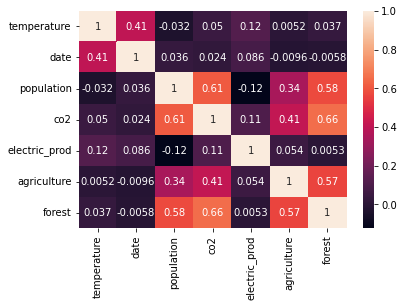

In [ ]:
sns.heatmap(relacion.corr(), annot=True)

In [ ]:
mediana = relacion.groupby('date').median()
mediana

,temperature,population,co2,electric_prod,agriculture,forest
date,,,,,,
"1,990.0",0.5,"12,446,168.0","29,310.0","1,072.0","104,280.0","69,877.8"
"1,991.0",0.4,"12,815,400.0","28,820.0","1,096.2","104,160.0","69,668.3"
"1,992.0",0.3,"10,399,061.0","26,340.0","1,753.0","93,550.0","41,270.0"
"1,993.0",0.3,"10,776,595.0","26,275.0","1,535.6","96,460.0","43,424.1"
"1,994.0",0.6,"10,887,337.0","30,615.0","1,628.8","93,165.0","43,341.5"
"1,995.0",0.7,"10,986,437.0","30,630.0","1,606.4","92,560.0","43,111.0"
"1,996.0",0.3,"11,075,007.5","27,835.0","1,661.6","92,480.0","42,825.0"
"1,997.0",0.6,"11,220,808.0","28,195.0","1,747.2","92,535.0","42,539.0"
"1,998.0",1.1,"11,396,647.0","28,560.0","1,793.6","92,900.0","42,253.0"


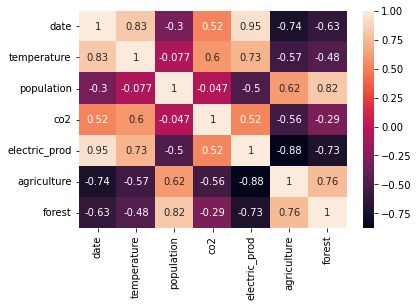

In [ ]:
sns.heatmap(mediana.reset_index().corr(), annot=True)

### Analisis multivariado

In [ ]:
from pandas.plotting import scatter_matrix

Hicimos un análisis multivariado para contrastar el efecto de las variables de interés entre sí.

Vemos tendencias bastante obvias como el aumento de producción eléctrica yendo de la mano con el aumento de población, el uso de la variable fecha es bastante coherente pues muestra la evolución de las variables en el tiempo.

¿Cómo incide el CO2 en la temperatura?

Variables como el aumento en emisiones de CO2 y la producción de energía eléctrica presentan una correlación positiva con el aumento de temperatura.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9f7656730>,
      dtype=object)

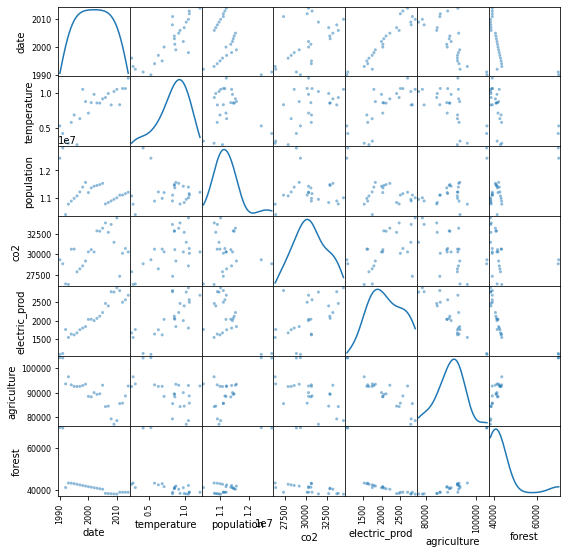

In [ ]:
scatter_matrix(mediana.reset_index(), diagonal='kde', figsize=(9,9))

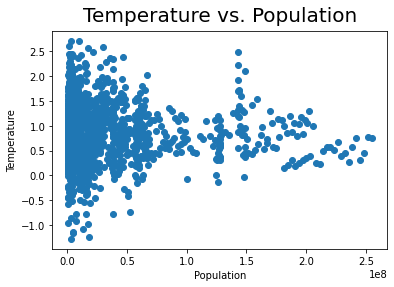

In [ ]:
plt.scatter(relacion['population'],relacion['temperature'])
plt.title("Temperature vs. Population", fontsize=20, verticalalignment='bottom')
plt.xlabel("Population")
plt.ylabel("Temperature")
plt.show()

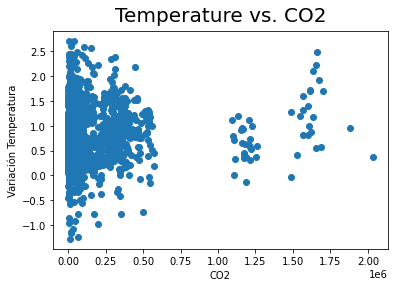

In [ ]:
plt.scatter(relacion['co2'],relacion['temperature'])
plt.title("Temperature vs. CO2", fontsize=20, verticalalignment='bottom')
plt.xlabel("CO2")
plt.ylabel("Variación Temperatura")
plt.show()

In [ ]:
# Necesitamos conocer el nombre especifico de las variables a considerar
# en nuestro modelo
relacion.columns 

Index(['Area', 'temperature', 'date', 'name', 'population', 'co2',
       'electric_prod', 'agriculture', 'forest'],
      dtype='object')

In [ ]:
# importación de las librerias necesarias
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from bokeh.resources import INLINE
import bokeh.io
from bokeh import *

bokeh.io.output_notebook(INLINE)

In [ ]:
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'temperature~co2' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1   = smf.ols(formula = model1, data = relacion).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.731
Date:                Wed, 11 Jan 2023   Prob (F-statistic):             0.0536
Time:                        23:22:49   Log-Likelihood:                -1306.2
No. Observations:                1521   AIC:                             2616.
Df Residuals:                    1519   BIC:                             2627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8322      0.016     50.763      0.0

Resultados

Lo que podemos observar en la matriz es que tanto, el aumento de los años, el crecimiento de la población y la producción de electricidad tienen correlación positiva con el aumento de temperatura así como los kilómetros cuadrados de bosque y la agricultura con inversamente proporcionales (correlación negativa)

### Pandas Profiling

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(argframe, title='Temperature change prediction', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Este reporte de profiling ha sido muy útil y revelador tanto que queremos explorar mejor la variable de cambio de temperatura ya que al parecer no se relaciona directamente con las dependientes. En la sección interactions vemos que la mejor es la de emisión de gases de efecto invernadero.

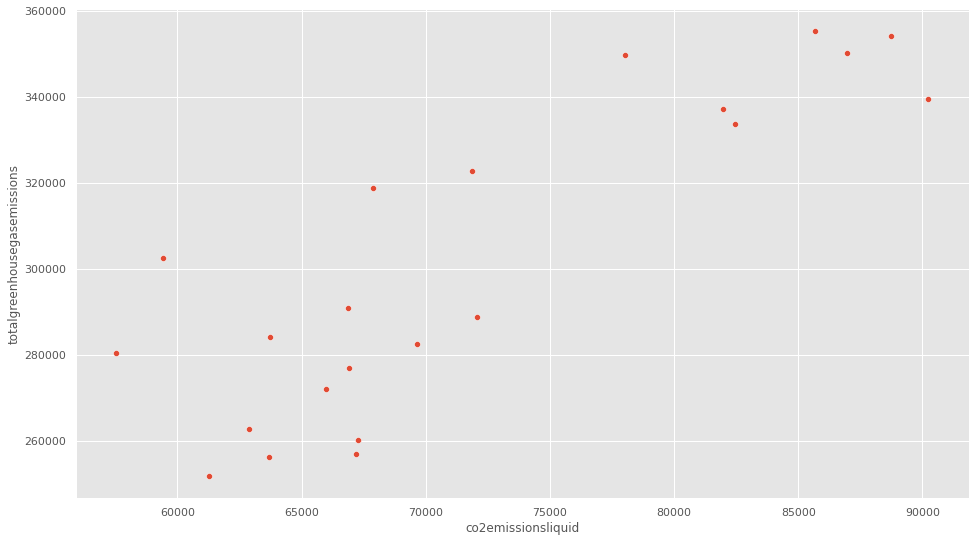

In [ ]:
g = sns.scatterplot(data=argframe, x="co2emissionsliquid", y="totalgreenhousegasemissions")

/usr/local/lib/python3.8/dist-packages/plotly/matplotlylib/renderer.py:574: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



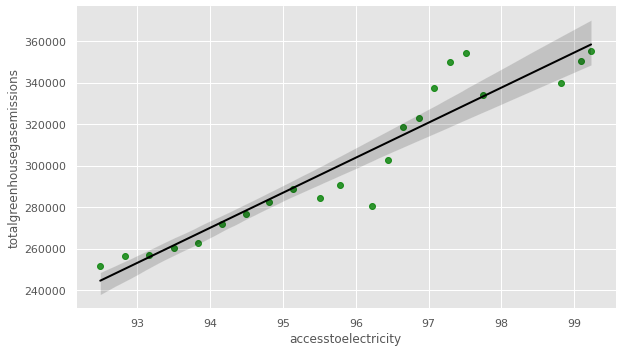

In [ ]:
sns.lmplot(x='accesstoelectricity', y='totalgreenhousegasemissions', data=argframe,
          scatter_kws={'color':'green', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=5, aspect=1.75);

Vemos que el acceso a la electricidad es la variable más robusta.

/usr/local/lib/python3.8/dist-packages/plotly/matplotlylib/renderer.py:574: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



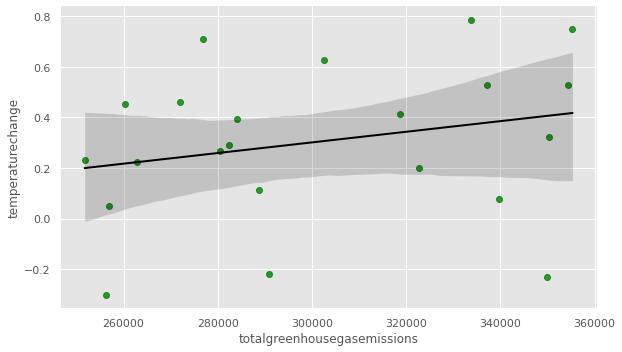

In [ ]:
sns.lmplot(x='totalgreenhousegasemissions', y='temperaturechange', data=argframe,
          scatter_kws={'color':'green', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=5, aspect=1.75);

En esta exploración observamos que cambio de temperatura es muy dispersa y no nos permite seguir un patrón.

## Regresion lineal - para prediccion de variables numericas continuas

In [ ]:
model1 = 'totalgreenhousegasemissions~accesstoelectricity' # modelo solo usando las variables de totalgreenhousegasemissions y accesstoelectricity
lm1   = smf.ols(formula = model1, data = argframe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:     totalgreenhousegasemissions   R-squared:                       0.898
Model:                                     OLS   Adj. R-squared:                  0.893
Method:                          Least Squares   F-statistic:                     176.5
Date:                         Wed, 11 Jan 2023   Prob (F-statistic):           2.20e-11
Time:                                 23:23:06   Log-Likelihood:                -236.50
No. Observations:                           22   AIC:                             477.0
Df Residuals:                               20   BIC:                             479.2
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

El resultado de R^2 es de 0.89 por lo que podemos interpretar que el 89% de los datos de acceso a la electricidad puede explicar elrresultado de las emisiones de gas invernadero, siendo esta una variable sólida.

Regresion Lineal Multiple

In [ ]:
model1 = 'totalgreenhousegasemissions~accesstoelectricity + agriculturalland + co2emissionsliquid + electricpower +electricityproductionfromnaturalgassources' # modelos con mas varaibles para predecir BMI
lm1   = smf.ols(formula = model1, data = argframe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:     totalgreenhousegasemissions   R-squared:                       0.970
Model:                                     OLS   Adj. R-squared:                  0.961
Method:                          Least Squares   F-statistic:                     103.8
Date:                         Wed, 11 Jan 2023   Prob (F-statistic):           1.30e-11
Time:                                 23:23:06   Log-Likelihood:                -223.02
No. Observations:                           22   AIC:                             458.0
Df Residuals:                               16   BIC:                             464.6
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------

En esta sección se eligieron nuevas variables y el resultado de R^2 fue mejor obteniendo 0.97, lo que nos hace sospechar de un posible overfitting.

In [ ]:
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'temperaturechange~date' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1   = smf.ols(formula = model1, data = argframe).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:      temperaturechange   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                nan
Time:                        23:23:06   Log-Likelihood:                 761.58
No. Observations:                  22   AIC:                            -1479.
Df Residuals:                       0   BIC:                            -1455.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2330        inf          0   

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
model4 = 'temperaturechange~date + accesstoelectricity +	agriculturalland +	co2emissions + co2emissionsliquid +	electricpower +	electricityproductionfromcoalsources +	electricityproductionfromhydroelectricsources +	electricityproductionfromnaturalgassources +	electricityproductionfromnuclearsources	+	forestarea +	metheaneemissionschange +	methaneemissions +	mortalityrate +	nitrousoxideemissionschange +	nitrousoxideemissionsmetric +	greenhousegasemissions +	population +	totalgreenhousegasemissions'
lm4    = smf.ols(formula = model4, data = argframe).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:      temperaturechange   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                nan
Time:                        23:23:06   Log-Likelihood:                 564.33
No. Observations:                  22   AIC:                            -1085.
Df Residuals:                       0   BIC:                            -1061.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
argframe.corr()

,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,energyuse,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
accesstoelectricity,1.0,0.9,-0.5,0.8,1.0,-0.1,-0.5,0.6,-1.0,-0.4,-1.0,-0.8,0.6,-1.0,0.9,0.8,0.7,-0.8,0.3,0.9
agriculturalland,0.9,1.0,-0.6,0.9,0.9,0.1,-0.7,0.4,-0.8,-0.6,-0.9,-0.8,0.6,-0.8,0.9,0.7,0.5,-0.6,0.2,0.9
co2emissions,-0.5,-0.6,1.0,-0.8,-0.6,-0.5,0.2,0.0,0.5,0.9,0.6,0.6,-0.0,0.5,-0.4,-0.2,-0.1,0.4,-0.2,-0.5
co2emissionsliquid,0.8,0.9,-0.8,1.0,0.8,0.3,-0.7,0.3,-0.6,-0.7,-0.8,-0.7,0.4,-0.7,0.7,0.6,0.4,-0.6,0.2,0.8
electricpower,1.0,0.9,-0.6,0.8,1.0,-0.0,-0.6,0.6,-0.9,-0.5,-1.0,-0.8,0.6,-1.0,0.9,0.8,0.7,-0.8,0.3,1.0
electricityproductionfromcoalsources,-0.1,0.1,-0.5,0.3,-0.0,1.0,-0.0,-0.3,0.1,-0.6,0.1,-0.1,-0.4,0.1,-0.2,-0.2,-0.5,0.2,0.1,-0.0
electricityproductionfromhydroelectricsources,-0.5,-0.7,0.2,-0.7,-0.6,-0.0,1.0,-0.6,0.5,0.3,0.6,0.5,-0.4,0.5,-0.5,-0.5,-0.5,0.4,0.0,-0.7
electricityproductionfromnaturalgassources,0.6,0.4,0.0,0.3,0.6,-0.3,-0.6,1.0,-0.7,0.1,-0.6,-0.3,0.6,-0.7,0.6,0.6,0.8,-0.7,0.1,0.6
electricityproductionfromnuclearsources,-1.0,-0.8,0.5,-0.6,-0.9,0.1,0.5,-0.7,1.0,0.3,0.9,0.7,-0.7,1.0,-0.9,-0.8,-0.7,0.8,-0.2,-0.9
energyuse,-0.4,-0.6,0.9,-0.7,-0.5,-0.6,0.3,0.1,0.3,1.0,0.4,0.5,0.1,0.3,-0.3,-0.1,0.1,0.2,-0.1,-0.5


In [ ]:
argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,2000,95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [ ]:
#argframe['date'] = pd.to_datetime(argframe['date'])
argframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 22
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   date                                           22 non-null     object 
 1   accesstoelectricity                            22 non-null     float64
 2   agriculturalland                               22 non-null     float64
 3   co2emissions                                   22 non-null     float64
 4   co2emissionsliquid                             22 non-null     float64
 5   electricpower                                  22 non-null     float64
 6   electricityproductionfromcoalsources           22 non-null     float64
 7   electricityproductionfromhydroelectricsources  22 non-null     float64
 8   electricityproductionfromnaturalgassources     22 non-null     float64
 9   electricityproductionfromnuclearsources        22 non-nu

In [ ]:
da= pd.read_csv('https://raw.githubusercontent.com/mcarbmont89/datascience/main/datosApi.csv', sep=',', encoding='cp1252')
daa=da[['datetime','tempmax','tempmin','feelslikemax','feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','snow','snowdepth','windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy','uvindex', 'sunrise', 'sunset', 'moonphase', 'conditions']]
daa

,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-09-11,19.8,12.8,19.8,12.8,16.5,7.3,58.8,0.0,0,...,"1,013.7",36.4,10.0,188.1,16.2,9,2020-09-11T06:57:46,2020-09-11T18:42:37,0.8,Partially cloudy
1,2020-09-12,14.6,9.3,14.6,8.1,12.6,6.0,64.4,0.0,0,...,"1,017.3",24.5,10.0,240.5,20.7,10,2020-09-12T06:56:22,2020-09-12T18:43:19,0.9,Partially cloudy
2,2020-09-13,17.7,10.4,17.7,10.4,14.9,9.2,70.9,0.0,0,...,"1,016.5",24.2,9.7,219.2,18.9,8,2020-09-13T06:54:57,2020-09-13T18:44:01,0.9,Partially cloudy
3,2020-09-14,15.2,8.7,15.2,7.7,12.5,0.2,42.8,0.0,0,...,"1,027.4",0.0,9.9,249.3,21.5,10,2020-09-14T06:53:32,2020-09-14T18:44:44,0.9,Clear
4,2020-09-15,14.9,10.5,14.9,10.5,12.7,4.9,59.6,0.0,0,...,"1,021.9",43.7,10.0,103.5,8.9,6,2020-09-15T06:52:07,2020-09-15T18:45:26,1.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2022-09-17,22.5,15.7,22.5,15.7,18.8,13.2,70.3,0.0,0,...,"1,017.3",79.0,10.0,176.8,15.2,6,2022-09-17T06:49:59,2022-09-17T18:46:32,0.7,Partially cloudy
737,2022-09-18,18.9,16.1,18.9,16.1,17.7,13.8,77.9,0.0,0,...,"1,013.6",87.7,10.0,166.0,14.4,6,2022-09-18T06:48:33,2022-09-18T18:47:15,0.8,Partially cloudy
738,2022-09-19,21.6,14.8,21.6,14.8,18.1,12.4,71.4,0.0,100,...,"1,013.8",56.1,9.8,214.0,18.6,8,2022-09-19T06:47:08,2022-09-19T18:47:58,0.8,"Rain, Partially cloudy"
739,2022-09-20,15.7,8.8,15.7,6.4,11.8,6.8,69.8,0.0,0,...,"1,017.6",62.0,10.0,191.9,16.6,5,2022-09-20T06:45:42,2022-09-20T18:48:41,0.9,Partially cloudy


In [ ]:
# remplazar  "?" con NaN
daa.replace("?", np.nan, inplace = True)
daa.head(5)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2020-09-11,19.8,12.8,19.8,12.8,16.5,7.3,58.8,0.0,0,...,"1,013.7",36.4,10.0,188.1,16.2,9,2020-09-11T06:57:46,2020-09-11T18:42:37,0.8,Partially cloudy
1,2020-09-12,14.6,9.3,14.6,8.1,12.6,6.0,64.4,0.0,0,...,"1,017.3",24.5,10.0,240.5,20.7,10,2020-09-12T06:56:22,2020-09-12T18:43:19,0.9,Partially cloudy
2,2020-09-13,17.7,10.4,17.7,10.4,14.9,9.2,70.9,0.0,0,...,"1,016.5",24.2,9.7,219.2,18.9,8,2020-09-13T06:54:57,2020-09-13T18:44:01,0.9,Partially cloudy
3,2020-09-14,15.2,8.7,15.2,7.7,12.5,0.2,42.8,0.0,0,...,"1,027.4",0.0,9.9,249.3,21.5,10,2020-09-14T06:53:32,2020-09-14T18:44:44,0.9,Clear
4,2020-09-15,14.9,10.5,14.9,10.5,12.7,4.9,59.6,0.0,0,...,"1,021.9",43.7,10.0,103.5,8.9,6,2020-09-15T06:52:07,2020-09-15T18:45:26,1.0,Partially cloudy


In [ ]:
missing_data = daa.isnull()
missing_data.head(5)

,datetime,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

datetime
False    741
Name: datetime, dtype: int64

tempmax
False    741
Name: tempmax, dtype: int64

tempmin
False    741
Name: tempmin, dtype: int64

feelslikemax
False    741
Name: feelslikemax, dtype: int64

feelslikemin
False    741
Name: feelslikemin, dtype: int64

feelslike
False    741
Name: feelslike, dtype: int64

dew
False    741
Name: dew, dtype: int64

humidity
False    741
Name: humidity, dtype: int64

precip
False    741
Name: precip, dtype: int64

precipprob
False    741
Name: precipprob, dtype: int64

precipcover
False    741
Name: precipcover, dtype: int64

snow
False    741
Name: snow, dtype: int64

snowdepth
False    741
Name: snowdepth, dtype: int64

windgust
False    414
True     327
Name: windgust, dtype: int64

windspeed
False    741
Name: windspeed, dtype: int64

winddir
False    741
Name: winddir, dtype: int64

sealevelpressure
False    739
True       2
Name: sealevelpressure, dtype: int64

cloudcover
False    741
Name: cloudcover, dtype: int64

visibility
Fal

In [ ]:
avg_windgust = daa["windgust"].astype("float").mean(axis=0)
print("Average of windgust:", avg_windgust)

Average of windgust: 41.02270531400966


In [ ]:
daa["windgust"].replace(np.nan, avg_windgust, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
avg_slp = daa["sealevelpressure"].astype("float").mean(axis=0)
print("Average of sealevelpressure:", avg_slp)

Average of sealevelpressure: 1016.0802435723951


In [ ]:
daa["sealevelpressure"].replace(np.nan, avg_slp, inplace=True)

In [ ]:
daa2 = daa.rename(columns={'name':'Country',
                                   'datetime':'date'})

daa2.columns

Index(['date', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions'],
      dtype='object')

In [ ]:
daa2['date'] = pd.to_datetime(daa2['date'])
daa2['date']

0     2020-09-11
1     2020-09-12
2     2020-09-13
3     2020-09-14
4     2020-09-15
         ...    
736   2022-09-17
737   2022-09-18
738   2022-09-19
739   2022-09-20
740   2022-09-21
Name: date, Length: 741, dtype: datetime64[ns]

In [ ]:
#daa2['date'] = daa2['date'].astype(float)
daa2['precipprob'] = daa2['precipprob'].astype(float)
daa2['uvindex'] = daa2['uvindex'].astype(float)
daa2['uvindex'] = daa2['uvindex'].astype(float)

In [ ]:
daa2['date'] = daa2['date'].astype(str)

In [ ]:
argframe['date'] = argframe['date'].astype(str)

In [ ]:
argframe

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
1,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
2,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
3,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
4,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
5,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
6,1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,...,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
7,1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,...,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
8,1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,...,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
9,1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,...,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"
10,2000,95.8,47.0,0.3,"66,875.1","2,088.8",2.0,32.4,54.6,6.9,...,"333,780.0",-2.8,"115,920.0",19.6,9.3,"39,280.0",115.9,1.1,-0.2,"290,820.0"


In [ ]:
df_merge1 = pd.merge(argframe,
                    daa2, on='date',
                    how = 'outer')
df_merge1

,date,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,017.3",79.0,10.0,176.8,15.2,6.0,2022-09-17T06:49:59,2022-09-17T18:46:32,0.7,Partially cloudy
759,2022-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,013.6",87.7,10.0,166.0,14.4,6.0,2022-09-18T06:48:33,2022-09-18T18:47:15,0.8,Partially cloudy
760,2022-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,013.8",56.1,9.8,214.0,18.6,8.0,2022-09-19T06:47:08,2022-09-19T18:47:58,0.8,"Rain, Partially cloudy"
761,2022-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,017.6",62.0,10.0,191.9,16.6,5.0,2022-09-20T06:45:42,2022-09-20T18:48:41,0.9,Partially cloudy


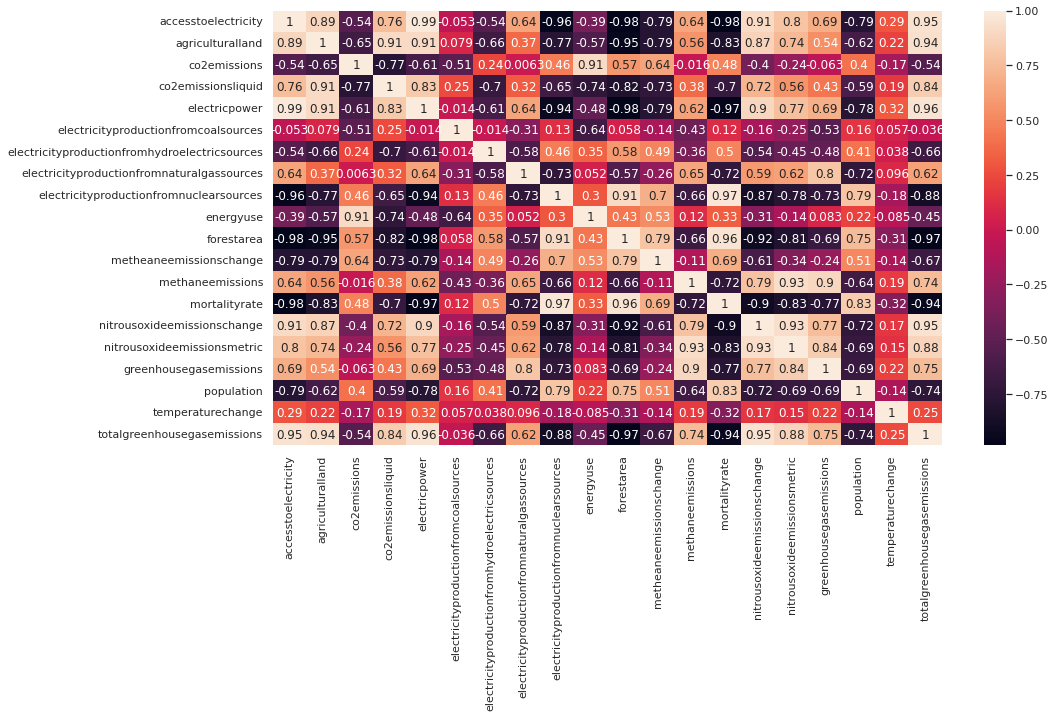

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(argframe.corr(), annot=True)

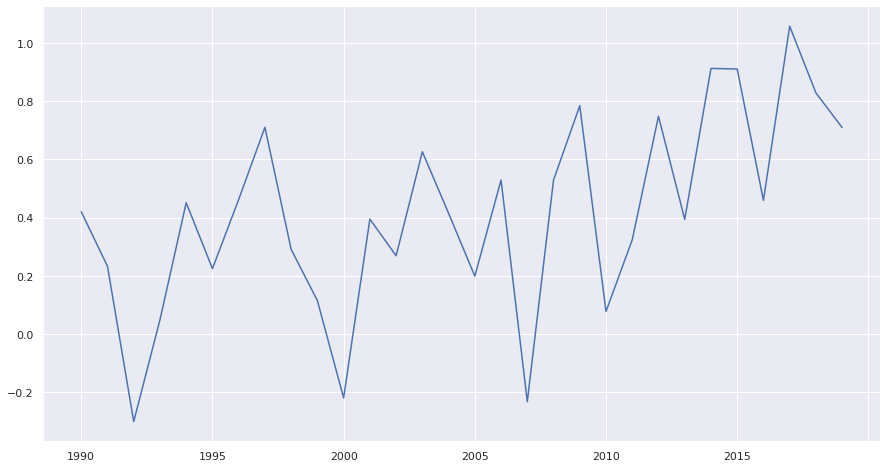

In [ ]:
datafinal.query('`Indicator Name`== "Temperature change"').groupby('Country Name').first().loc['Argentina'].iloc[2:].plot()

Analisis multivariado

Estudio de la variacion del tiempo en funcion de la poplacion, co2, el consumo electrico y la forestacion del mundo y en Argentina, en el mismo periodo de tiempo

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
relacion

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
5,Australia,0.5,"1,990.0",AUS,"17,065,100.0","263,630.0","8,527.2","4,644,370.0","1,338,822.0"
7,Bahrain,0.4,"1,990.0",BHR,"495,927.0","10,740.0","15,621.3",80.0,2.2
13,Brazil,0.5,"1,990.0",BRA,"149,003,225.0","197,900.0","1,460.8","2,349,000.0","5,888,980.0"
14,Brunei Darussalam,0.5,"1,990.0",BRN,"258,714.0","3,260.0","4,325.2",110.0,"4,130.0"
...,...,...,...,...,...,...,...,...,...
2470,Ukraine,1.7,"2,014.0",UKR,"45,272,155.0","237,730.0","3,418.6","415,110.0","96,352.0"
2471,United Kingdom,1.7,"2,014.0",GBR,"64,602,298.0","415,600.0","5,130.4","172,320.0","31,358.0"
2472,Uruguay,1.1,"2,014.0",URY,"3,400,439.0","6,500.0","3,085.2","142,948.0","18,822.6"
2473,Uzbekistan,0.2,"2,014.0",UZB,"30,757,700.0","104,870.0","1,645.4","255,420.0","35,094.4"


In [ ]:
arg = relacion[
  relacion['Area'].isin(['Argentina',
                         
                     

                              ])
][['Area',
     'temperature',
     'co2',
     'agriculture',
   'forest'
     ]]

¿Qué actividad industrial/económica que haya emergido en el tiempo puede relacionarse con el cambio de temperatura?

Aparte del uso de energía eléctrica y el CO2 en el caso particular de Argentina destacan las actividades Agrícolas y la deforestación. La evolución de las ciudades ha hecho que las industrias alimentarias tengan que emplear métodos intensivos que pueden no ser sostenibles.

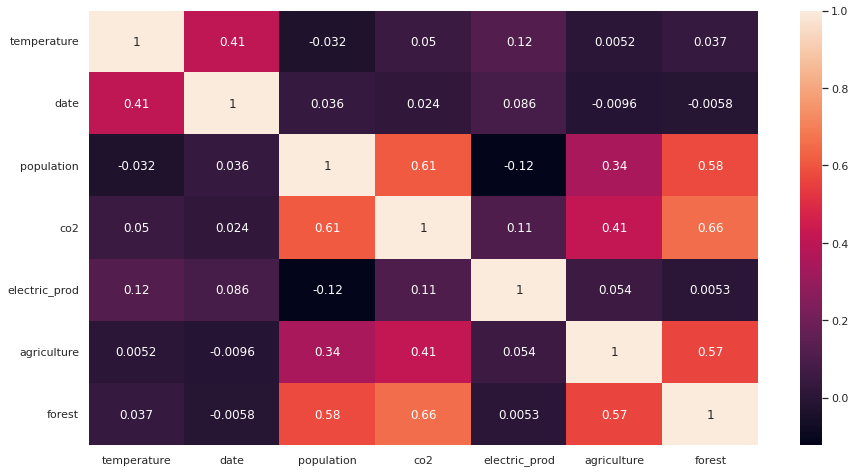

In [ ]:
sns.heatmap(relacion.corr(), annot=True)

¿Cómo se comportan el resto de las variables?

Otra forma de ver el impacto de las variables entre sí es por medio de los mapas de calor. En este caso se pueden visualizar mejor las relaciones entre sí.

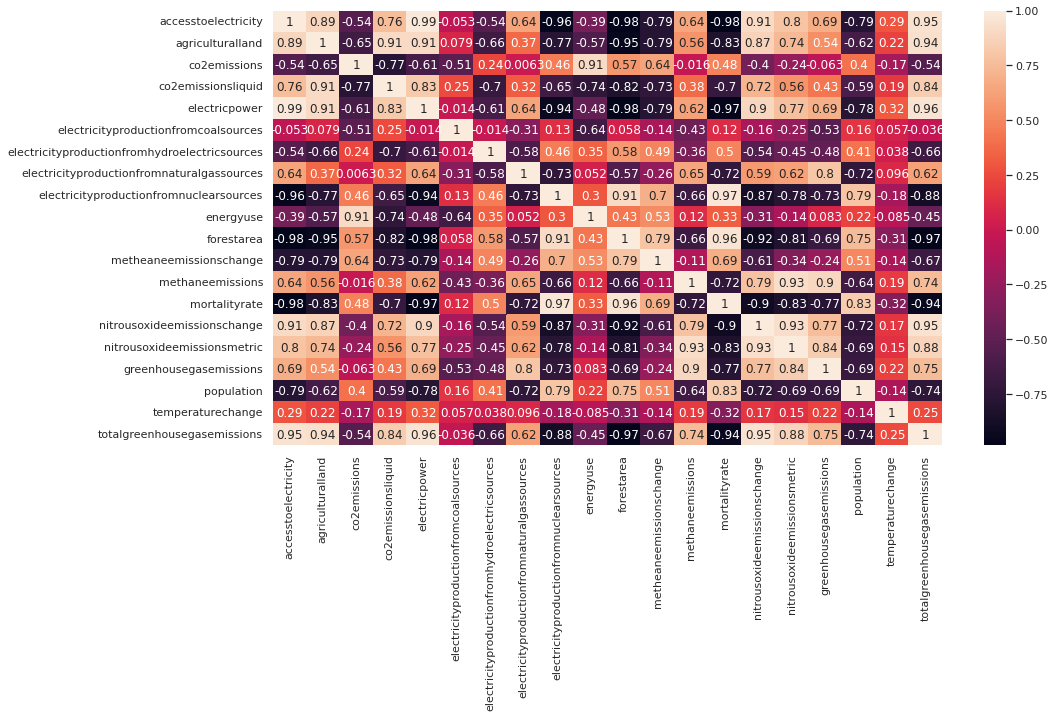

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(argframe.corr(), annot=True)

# v) Preprocesamiento de Datos

**Encoding**

No es necesario hacer una codificacion de las variables ya que todas son continuas

# vi) Splitting de dataset

En esta seccion, hacemos la primera division con todas las variables para obtener los resultados de una regresion. Aun no hacemos la ingenieria de atributos ya que para nosotros esta regresion es preliminar y la ingenieria de atributos la vamos a usar con un algoritmo mas robusto como XGBOOST y SVC.

In [ ]:
argframe.columns

Index(['date', 'accesstoelectricity', 'agriculturalland', 'co2emissions',
       'co2emissionsliquid', 'electricpower',
       'electricityproductionfromcoalsources',
       'electricityproductionfromhydroelectricsources',
       'electricityproductionfromnaturalgassources',
       'electricityproductionfromnuclearsources', 'energyuse', 'forestarea',
       'metheaneemissionschange', 'methaneemissions', 'mortalityrate',
       'nitrousoxideemissionschange', 'nitrousoxideemissionsmetric',
       'greenhousegasemissions', 'population', 'temperaturechange',
       'totalgreenhousegasemissions'],
      dtype='object')

In [ ]:
X = argframe[['temperaturechange', 'accesstoelectricity', 'agriculturalland','co2emissionsliquid']]
y = argframe['totalgreenhousegasemissions']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([-3.18384480e+03,  7.84676145e+03,  6.48699354e+03,  4.80794089e-03])

In [ ]:
regressor.intercept_

-770052.2763107596

In [ ]:
X.columns

Index(['temperaturechange', 'accesstoelectricity', 'agriculturalland',
       'co2emissionsliquid'],
      dtype='object')

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
temperaturechange,"-3,183.8"
accesstoelectricity,"7,846.8"
agriculturalland,"6,487.0"
co2emissionsliquid,0.0


In [ ]:

y_pred = regressor.predict(X_test)
y_pred

array([257867.29561954, 305818.34012331, 280800.43257272, 262447.45715497,
       324860.29958078])

In [ ]:
y_test

1    251,720.0
14   318,700.0
9    288,710.0
2    256,240.0
16   337,250.0
Name: totalgreenhousegasemissions, dtype: float64

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Error']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Error,Error_porc
1,"251,720.0","257,867.3","-6,147.3",-2.4
14,"318,700.0","305,818.3","12,881.7",4.0
9,"288,710.0","280,800.4","7,909.6",2.7
2,"256,240.0","262,447.5","-6,207.5",-2.4
16,"337,250.0","324,860.3","12,389.7",3.7


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [ ]:
print("MAE",mean_absolute_error(y_pred, y_test))
print("SMQR",np.sqrt(mean_squared_error(y_pred, y_test)))
print("MSE",mean_squared_error(y_pred, y_test))
print("R^2",r2_score(y_pred, y_test))

MAE 9107.13855954035
SMQR 9574.18559535098
MSE 91665029.8142262
R^2 0.8600727341135939


# vii) Feature Selection : Wrapper Methods

### Forward selection

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
argframe.columns

Index(['date', 'accesstoelectricity', 'agriculturalland', 'co2emissions',
       'co2emissionsliquid', 'electricpower',
       'electricityproductionfromcoalsources',
       'electricityproductionfromhydroelectricsources',
       'electricityproductionfromnaturalgassources',
       'electricityproductionfromnuclearsources', 'energyuse', 'forestarea',
       'metheaneemissionschange', 'methaneemissions', 'mortalityrate',
       'nitrousoxideemissionschange', 'nitrousoxideemissionsmetric',
       'greenhousegasemissions', 'population', 'temperaturechange',
       'totalgreenhousegasemissions'],
      dtype='object')

In [ ]:
x= argframe[['accesstoelectricity', 'agriculturalland', 'co2emissions',
       'co2emissionsliquid', 'electricpower',
       'electricityproductionfromcoalsources',
       'electricityproductionfromhydroelectricsources',
       'electricityproductionfromnaturalgassources',
       'electricityproductionfromnuclearsources', 'energyuse', 'forestarea',
       'metheaneemissionschange', 'methaneemissions', 'mortalityrate',
       'nitrousoxideemissionschange', 'nitrousoxideemissionsmetric',
       'greenhousegasemissions', 'population', 'temperaturechange']]

In [ ]:
forward_selection(x,y)

<ipython-input-133-8c8c1be6a66e>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-133-8c8c1be6a66e>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-133-8c8c1be6a66e>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-133-8c8c1be6a66e>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['forestarea',
 'nitrousoxideemissionsmetric',
 'co2emissionsliquid',
 'electricityproductionfromnaturalgassources',
 'population']

### Backward selection

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
              break 
    return features

In [ ]:
backward_elimination(x,y)

['accesstoelectricity',
 'agriculturalland',
 'co2emissions',
 'electricityproductionfromhydroelectricsources',
 'electricityproductionfromnaturalgassources',
 'forestarea',
 'metheaneemissionschange',
 'mortalityrate',
 'nitrousoxideemissionsmetric',
 'greenhousegasemissions',
 'population']

### Eliminación bidireccional (stepwise)

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(x,y)

<ipython-input-139-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-139-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['forestarea',
 'nitrousoxideemissionsmetric',
 'co2emissionsliquid',
 'electricityproductionfromnaturalgassources',
 'population',
 'energyuse']

# viii) Modelado de Machine Learning

### Algoritmo Random Forest

Encontramos que el Random Forest tiene una función de regresión y es la que utilizaríamos como modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
random_forest = RandomForestRegressor()

In [ ]:
params = {
    'n_estimators' : [50],
    'max_features': [4,5],
    'criterion': ['mse', 'absolute_error'],
    'max_depth':[4,5]
}


grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  
                                  cv = 2, 
                                  verbose = 3, 
                                  n_jobs = -1) 


In [ ]:
X = x= argframe[['accesstoelectricity', 'agriculturalland', 'co2emissions',
       'co2emissionsliquid', 'electricpower',
       'electricityproductionfromcoalsources',
       'electricityproductionfromhydroelectricsources',
       'electricityproductionfromnaturalgassources',
       'electricityproductionfromnuclearsources', 'energyuse', 'forestarea',
       'metheaneemissionschange', 'methaneemissions', 'mortalityrate',
       'nitrousoxideemissionschange', 'nitrousoxideemissionsmetric',
       'greenhousegasemissions', 'population', 'temperaturechange']]
y = argframe['totalgreenhousegasemissions']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
grid_random_forest.fit(x_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'absolute_error'],
                         'max_depth': [4, 5], 'max_features': [4, 5],
                         'n_estimators': [50]},
             scoring='neg_mean_absolute_error', verbose=3)

Con esta función se entrena el modelo usando x_train y y_train

In [ ]:
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5, max_features=5,
                      n_estimators=50)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 5,
 'n_estimators': 50}

### Algoritmo SVR

Como algoritmo para comparar queremos utilizar el SVR, Support Vector Regression

In [ ]:
from sklearn import svm
regr = svm.SVR()                            
regr.fit(X, y)

SVR()

In [ ]:
regr.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([289765.48500788])

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

Ahora intentamos hacer GridSearchCV

In [ ]:
from sklearn import svm, datasets      
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)


In [ ]:
import pandas as pd

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
1_linear,"{'C': 1, 'kernel': 'linear'}",1,1.0,0.0
10_rbf,"{'C': 10, 'kernel': 'rbf'}",1,1.0,0.0
10_linear,"{'C': 10, 'kernel': 'linear'}",3,1.0,0.0
1_rbf,"{'C': 1, 'kernel': 'rbf'}",4,1.0,0.0


Usando el GridSearch pudimos obtener el best score

In [ ]:
print('Best score: ', clf.best_score_)

Best score:  0.9800000000000001


Este resultado nos hace dudar ya que el valor es muy cerano a 1 y esto nos puede dar indicios de que hay un overfitting.

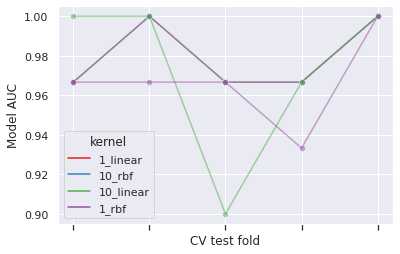

In [ ]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print

### Algoritmo K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
relacion.describe()

,temperature,date,population,co2,electric_prod,agriculture,forest
count,"1,521.0","1,521.0","1,521.0","1,521.0","1,521.0","1,521.0","1,521.0"
mean,0.8,"2,002.5","30,172,529.3","133,064.9","4,007.1","319,492.7","333,660.3"
std,0.6,7.1,"44,715,768.0","265,399.3","5,980.5","714,327.8","1,199,448.4"
min,-1.3,"1,990.0","254,826.0",190.0,18.7,80.0,2.2
25%,0.5,"1,996.0","4,238,389.0","7,040.0",794.0,"21,490.0","12,474.0"
50%,0.8,"2,003.0","11,104,899.0","29,310.0","2,005.3","91,700.0","41,270.0"
75%,1.2,"2,009.0","38,120,560.0","129,890.0","5,091.3","265,780.0","182,738.4"
max,2.7,"2,014.0","255,128,076.0","2,030,810.0","54,799.2","4,691,430.0","8,151,356.0"


In [ ]:
relacion.head()

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
5,Australia,0.5,"1,990.0",AUS,"17,065,100.0","263,630.0","8,527.2","4,644,370.0","1,338,822.0"
7,Bahrain,0.4,"1,990.0",BHR,"495,927.0","10,740.0","15,621.3",80.0,2.2
13,Brazil,0.5,"1,990.0",BRA,"149,003,225.0","197,900.0","1,460.8","2,349,000.0","5,888,980.0"
14,Brunei Darussalam,0.5,"1,990.0",BRN,"258,714.0","3,260.0","4,325.2",110.0,"4,130.0"


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


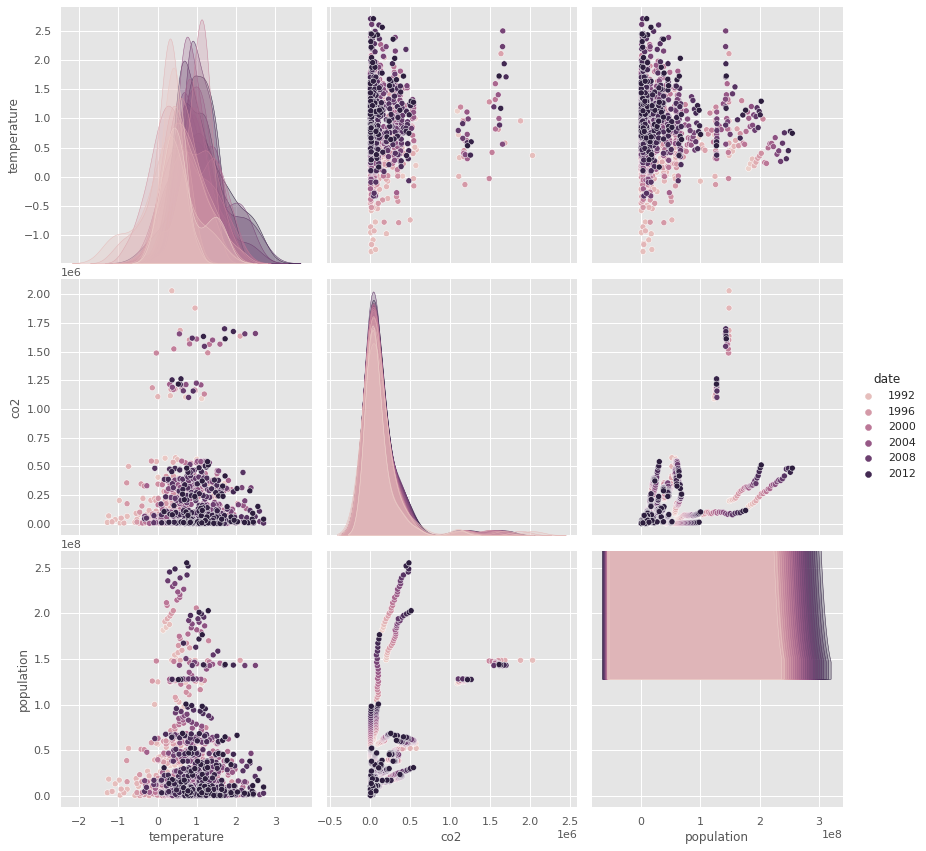

In [ ]:
sb.pairplot(relacion.dropna(), hue='date',size=4,vars=["temperature","co2","population"],kind='scatter')

Podemos observar que los grupos de datos (Clusteres) de 2012 para la temperatura y emisiones de co2 se agrupan hacia la derecha lo que denota un aumento en dicha variable.

In [ ]:
X = np.array(relacion[["temperature","co2","population"]])
y = np.array(relacion['date'])
X.shape

(1521, 3)

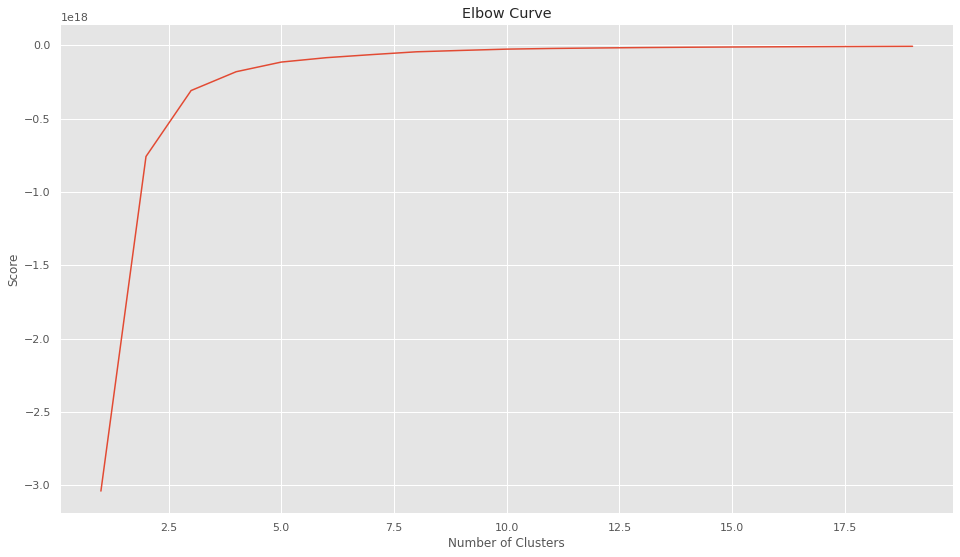

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Se elije el valor 5 de Clusters como un valor estable para aplicar este predictor

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[8.30127883e-01 3.29600105e+04 6.83745936e+06]
 [6.67279070e-01 3.25079302e+05 2.04844259e+08]
 [7.88763314e-01 2.53036390e+05 6.50861340e+07]
 [9.58877698e-01 1.55648957e+05 3.22917455e+07]
 [8.67428571e-01 9.21245190e+05 1.37461245e+08]]


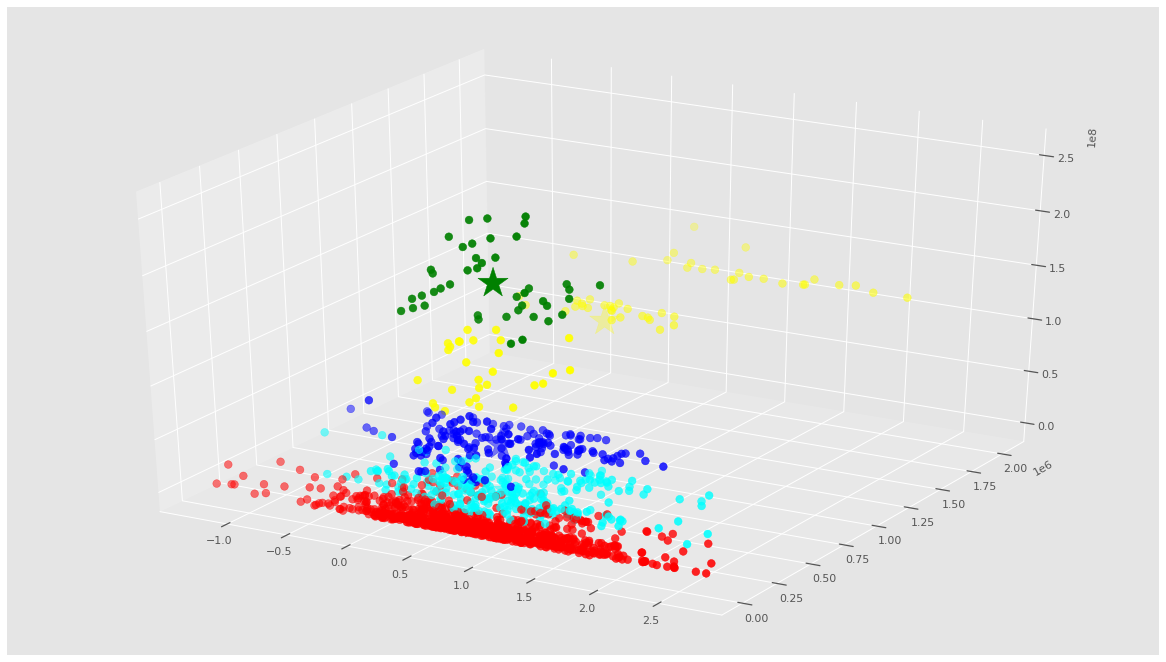

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

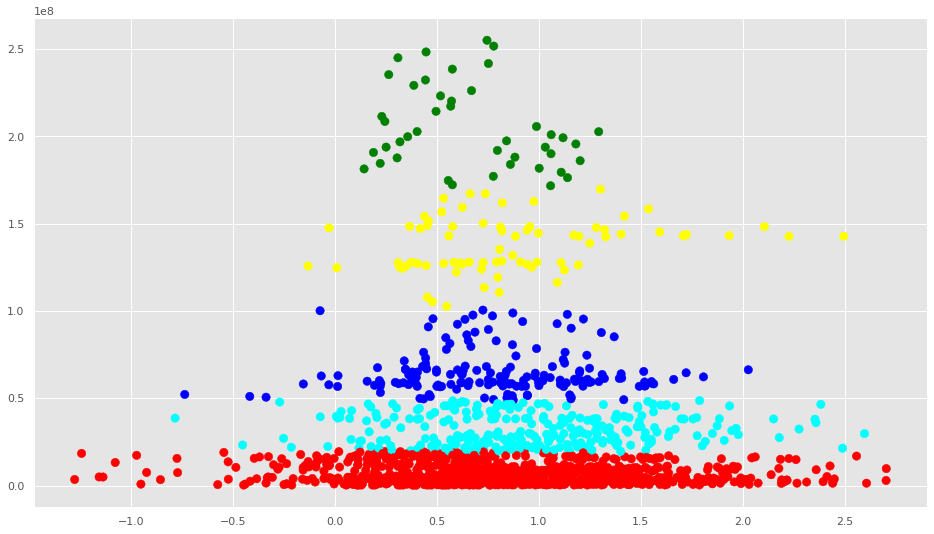

In [ ]:
f1 = relacion['temperature'].values
f2 = relacion['population'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

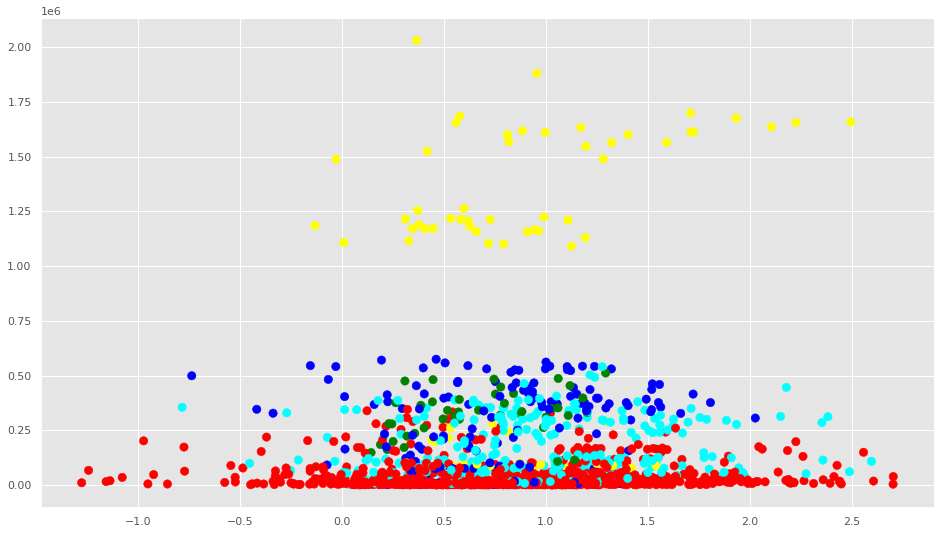

In [ ]:
# Getting the values and plotting it
f1 = relacion['temperature'].values
f2 = relacion['co2'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

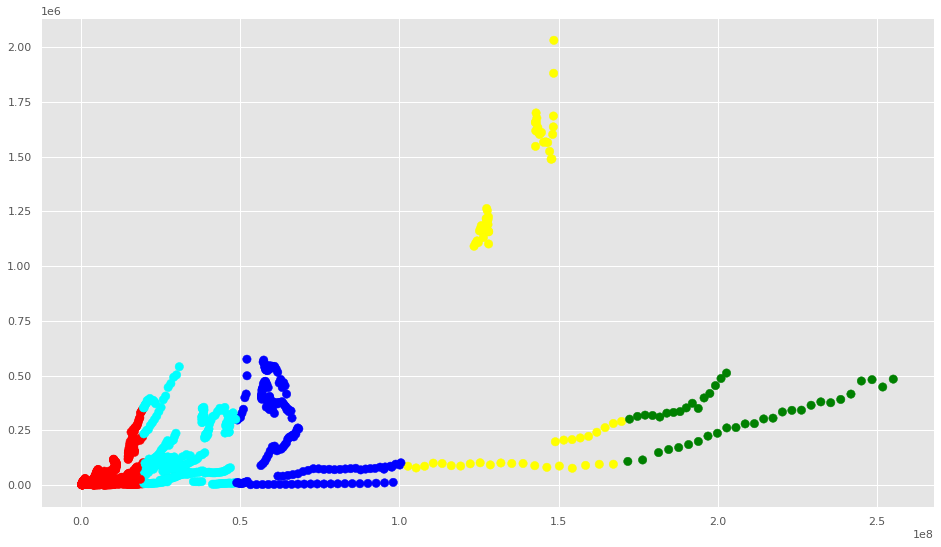

In [ ]:
from matplotlib.collections import RegularPolyCollection
f1 = relacion['population'].values
f2 = relacion['co2'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()


In [ ]:
#Carga de las librerías
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
#Separación en Train y Test
X = argframe[['accesstoelectricity', 'agriculturalland', 'co2emissions',
       'co2emissionsliquid', 'electricpower',
       'electricityproductionfromcoalsources',
       'electricityproductionfromhydroelectricsources',
       'electricityproductionfromnaturalgassources',
       'electricityproductionfromnuclearsources', 'energyuse', 'forestarea',
       'metheaneemissionschange', 'methaneemissions', 'mortalityrate',
       'nitrousoxideemissionschange', 'nitrousoxideemissionsmetric',
       'greenhousegasemissions', 'population', 'temperaturechange']]
y = argframe['totalgreenhousegasemissions']

In [ ]:
#Train y Test Split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dfi=argframe.set_index('date')
dfi

,accesstoelectricity,agriculturalland,co2emissions,co2emissionsliquid,electricpower,electricityproductionfromcoalsources,electricityproductionfromhydroelectricsources,electricityproductionfromnaturalgassources,electricityproductionfromnuclearsources,energyuse,forestarea,metheaneemissionschange,methaneemissions,mortalityrate,nitrousoxideemissionschange,nitrousoxideemissionsmetric,greenhousegasemissions,population,temperaturechange,totalgreenhousegasemissions
date,,,,,,,,,,,,,,,,,,,,
1991,92.5,46.6,0.4,"61,282.9","1,347.6",1.7,30.3,39.2,14.5,94.3,"350,214.0",-1.4,"108,710.0",28.1,-1.8,"35,450.0",-8.1,1.4,0.2,"251,720.0"
1992,92.8,46.7,0.3,"63,684.8","1,410.4",1.5,34.7,37.3,12.7,91.9,"348,388.0",0.1,"110,650.0",27.3,1.1,"36,180.0",-9.4,1.4,-0.3,"256,240.0"
1993,93.2,46.7,0.3,"67,205.1","1,496.9",1.9,38.8,35.7,12.6,85.2,"346,562.0",-0.5,"109,540.0",26.3,1.3,"35,700.0",1.5,1.3,0.0,"256,820.0"
1994,93.5,46.8,0.3,"67,260.1","1,576.8",3.6,42.4,33.9,12.8,85.6,"344,736.0",-1.0,"110,490.0",25.2,-1.5,"36,660.0",-40.8,1.3,0.5,"260,200.0"
1995,93.8,46.8,0.3,"62,885.4","1,648.9",2.8,40.0,39.6,10.5,89.4,"342,910.0",0.1,"111,970.0",24.1,-0.0,"36,710.0",-29.8,1.2,0.2,"262,790.0"
1996,94.2,46.8,0.3,"65,976.7","1,728.1",2.8,32.9,46.5,10.7,87.8,"341,084.0",-0.7,"110,720.0",23.1,3.4,"37,060.0",-25.0,1.2,0.5,"271,990.0"
1997,94.5,46.9,0.3,"66,922.8","1,848.0",2.6,38.7,44.2,11.0,83.8,"339,258.0",0.5,"111,150.0",22.1,2.0,"37,380.0",29.0,1.2,0.7,"276,770.0"
1998,94.8,46.9,0.3,"69,632.7","1,967.3",2.4,35.7,45.9,10.1,83.5,"337,432.0",-1.8,"110,140.0",21.2,4.2,"37,040.0",28.8,1.1,0.3,"282,380.0"
1999,95.1,46.9,0.3,"72,071.2","2,033.8",2.6,26.6,56.5,8.8,87.9,"335,606.0",-3.7,"114,050.0",20.4,8.8,"37,210.0",130.5,1.1,0.1,"288,710.0"


In [ ]:
relacion.head()

,Area,temperature,date,name,population,co2,electric_prod,agriculture,forest
1,Algeria,1.3,"1,990.0",DZA,"25,758,872.0","62,940.0",531.6,"386,760.0","16,670.0"
5,Australia,0.5,"1,990.0",AUS,"17,065,100.0","263,630.0","8,527.2","4,644,370.0","1,338,822.0"
7,Bahrain,0.4,"1,990.0",BHR,"495,927.0","10,740.0","15,621.3",80.0,2.2
13,Brazil,0.5,"1,990.0",BRA,"149,003,225.0","197,900.0","1,460.8","2,349,000.0","5,888,980.0"
14,Brunei Darussalam,0.5,"1,990.0",BRN,"258,714.0","3,260.0","4,325.2",110.0,"4,130.0"


In [ ]:
# Import Plotly & Cufflinks libraries and run it in Offline mode
import plotly.offline as py
py.init_notebook_mode(connected=True)
py.enable_mpl_offline()

import cufflinks as cf
cf.go_offline()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ix) Explicacion de Modelos

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
argframe_scaled = sc.fit_transform(X)
argframe_scaled.shape

(22, 19)

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False) # Instancio con dos factores comunes
fa.fit(argframe_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
fa.get_communalities()

array([0.95441611, 0.90238353, 0.84965561, 0.87327742, 0.97996694,
       0.66341708, 0.40443174, 0.67958004, 0.87710473, 0.86444775,
       0.96866925, 0.70676199, 0.84070817, 0.95169899, 0.89491684,
       0.83553911, 0.90339009, 0.69463195, 0.066711  ])

### Visualizacion de Resultados de Modelo

Varianzas comunes

X1: Alrededor del 95% de la variabilidad de X1 se explica por los dos factores que seleccionamos.

X2: Alrededor del 90% de la variabilidad de X2 se explica por los dos factores que seleccionamos.

X3: Alrededor del 84% de la variabilidad de X3 se explica por los dos factores que seleccionamos.

X4: Alrededor del 87% de la variabilidad de X4 se explica por los dos factores que seleccionamos.

X5: Alrededor del 97% de la variabilidad de X5 se explica por los dos factores que seleccionamos.

X6: Alrededor del 66% de la variabilidad de X6 se explica por los dos factores que seleccionamos.

X7: Alrededor del 40% de la variabilidad de X7 se explica por los dos factores que seleccionamos.

X8: Alrededor del 67% de la variabilidad de X1 se explica por los dos factores que seleccionamos.

X9: Alrededor del 87% de la variabilidad de X2 se explica por los dos factores que seleccionamos.

X10: Alrededor del 86% de la variabilidad de X3 se explica por los dos factores que seleccionamos.

X11: Alrededor del 96% de la variabilidad de X4 se explica por los dos factores que seleccionamos.

X12: Alrededor del 70% de la variabilidad de X5 se explica por los dos factores que seleccionamos.

X13: Alrededor del 84% de la variabilidad de X6 se explica por los dos factores que seleccionamos.

X14: Alrededor del 95% de la variabilidad de X7 se explica por los dos factores que seleccionamos.

X15: Alrededor del 89% de la variabilidad de X2 se explica por los dos factores que seleccionamos.

X16: Alrededor del 83% de la variabilidad de X3 se explica por los dos factores que seleccionamos.

X17: Alrededor del 90% de la variabilidad de X4 se explica por los dos factores que seleccionamos.

X18: Alrededor del 69% de la variabilidad de X5 se explica por los dos factores que seleccionamos.

X19: Alrededor del 6% de la variabilidad de X6 se explica por los dos factores que seleccionamos.

In [ ]:
fa.loadings_ # Matriz Factorial

array([[ 0.84260341, -0.4944043 ],
       [ 0.68324646, -0.65996803],
       [-0.12909534,  0.91268286],
       [ 0.51403189, -0.78041568],
       [ 0.82135449, -0.55257918],
       [-0.45418913, -0.67611338],
       [-0.523294  ,  0.36137948],
       [ 0.81955395,  0.08894578],
       [-0.86148705,  0.36734834],
       [ 0.02087687,  0.92952241],
       [-0.83034921,  0.5283838 ],
       [-0.42759896,  0.72382395],
       [ 0.90330408,  0.15732104],
       [-0.8944399 ,  0.38945635],
       [ 0.88210653, -0.34176733],
       [ 0.90706487, -0.11301518],
       [ 0.94150641,  0.13021436],
       [-0.79403327,  0.25326492],
       [ 0.20801191, -0.15310795]])

Segun la matriz factorial, las variables energyuse, forestarea, greenhousegasemissions y population definen el factor 1 (cargas altas en el factor 1, cargas relativamente pequeñas en el factor 2), mientras que las variables metheaneemissionschange, methaneemissions y nitrousoxideemissionschange definen el factor 2.

En nuestro análisis, el factor 1 representa los antecedentes de generacion de electricidad y el factor 2 representa los antecedentes de generacion de emisiones de co2 . Por lo tanto, podemos dar nombres relevantes para los dos factores de la siguiente manera.

Factor 1 → accesstoelectgricity (variable relacionada con la generacion de electricidad)

Factor 2 → co2emissions (variable relacionada con la generacion de emisiones de co2).

Esto tiene sentido porque los gases de efecto invernadero esta relacionado con el aumento del uso de electricidad y de la emision de co2



In [ ]:
df1=argframe
df1.head(0).transpose()

""
date
accesstoelectricity
agriculturalland
co2emissions
co2emissionsliquid
electricpower
electricityproductionfromcoalsources
electricityproductionfromhydroelectricsources
electricityproductionfromnaturalgassources
electricityproductionfromnuclearsources


Varianzas comunes

date: Alrededor del 95% de la variabilidad de date se explica por los dos factores que seleccionamos.

accesstoelectricity: Alrededor del 90% de la variabilidad de date se explica por los dos factores que seleccionamos.

agriculturalland: Alrededor del 84% de la variabilidad de agriculturalland se explica por los dos factores que seleccionamos.

co2emissions: Alrededor del 87% de la variabilidad de co2emissions se explica por los dos factores que seleccionamos.

co2emissionsliquid: Alrededor del 97% de la variabilidad de co2emissionsliquid se explica por los dos factores que seleccionamos.

electricpower: Alrededor del 66% de la variabilidad de electricpower se explica por los dos factores que seleccionamos.

electricityproductionfromcoalsources: Alrededor del 40% de la variabilidad de electricityproductionfromcoalsources se explica por los dos factores que seleccionamos.

electricityproductionfromhydroelectricsources: Alrededor del 67% de la variabilidad de X1 se explica por los dos factores que seleccionamos.

electricityproductionfromnaturalgassources: Alrededor del 87% de la variabilidad de accesstoelectricity se explica por los dos factores que seleccionamos.

electricityproductionfromnuclearsources: Alrededor del 86% de la variabilidad de agriculturalland se explica por los dos factores que seleccionamos.

energyuse: Alrededor del 96% de la variabilidad de co2emissions se explica por los dos factores que seleccionamos.

forestarea: Alrededor del 70% de la variabilidad de co2emissionsliquid se explica por los dos factores que seleccionamos.

metheaneemissionschange: Alrededor del 84% de la variabilidad de electricpower se explica por los dos factores que seleccionamos.

methaneemissions: Alrededor del 95% de la variabilidad de electricityproductionfromcoalsources se explica por los dos factores que seleccionamos.

nitrousoxideemissionschange: Alrededor del 89% de la variabilidad de accesstoelectricity se explica por los dos factores que seleccionamos.

nitrousoxideemissionschange: Alrededor del 83% de la variabilidad de agriculturalland se explica por los dos factores que seleccionamos.

greenhousegasemissions: Alrededor del 90% de la variabilidad de co2emissions se explica por los dos factores que seleccionamos.

population: Alrededor del 69% de la variabilidad de co2emissionsliquid se explica por los dos factores que seleccionamos.

temperaturechange: Alrededor del 6% de la variabilidad de electricpower se explica por los dos factores que seleccionamos.

# X) Insights y recomendaciones

El impacto del CO2 era predecible. Sin embargo, nos sorprendió el impacto de la actividad agrícola en el cambio de temperatura y el acceso a la electricidad ya que no precisamente es un factor relacionado directamente con la emisión de gases.
Recomendaciones

Ya que conocemos el impacto que tienen las emisiones y uso de energía. Para palear el efecto de la temperatura, sería recomendable incentivar el uso de energías renovables ya que a medida que aumenta la población, se hace necesario producir electricidad. 

En cuestión de la deforestación, se puede aprovechar el territorio para fomentar el crecimiento de la extensión forestal. También consideramos importante el control de la actividad agrícola para evitar efectos nocivos en el medio ambiente.

---



# Fuentes

https://scikit-learn.org/stable/modules/svm.html#regression 

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
 
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py